In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import itertools
%matplotlib inline 

style.use('seaborn-poster')
style.use('fivethirtyeight')

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
application_df=pd.read_csv(r"E:\Data Sciemce\DataSets\application_data.csv")
application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
previous_df=pd.read_csv(r"E:\Data Sciemce\DataSets\previous_application.csv")
previous_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Database dimensions
print("Application database dimension:" ,application_df.shape)
print("Previous Application database dimension:", previous_df.shape)

Application database dimension: (307511, 122)
Previous Application database dimension: (1670214, 37)


In [6]:
#Database size
print("Application database size:" ,application_df.size)
print("Previous Application database size:", previous_df.size)

Application database size: 37516342
Previous Application database size: 61797918


In [7]:
application_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [8]:
previous_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [9]:
application_df.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,100002.0,189145.5,278202.0,367142.5,456255.0
TARGET,307511.0,0.080729,0.272419,0.0,0.0,0.0,0.0,1.0
CNT_CHILDREN,307511.0,0.417052,0.722121,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,25650.0,112500.0,147150.0,202500.0,117000000.0
AMT_CREDIT,307511.0,599025.999706,402490.776996,45000.0,270000.0,513531.0,808650.0,4050000.0
...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,265992.0,0.007000,0.110757,0.0,0.0,0.0,0.0,9.0
AMT_REQ_CREDIT_BUREAU_WEEK,265992.0,0.034362,0.204685,0.0,0.0,0.0,0.0,8.0
AMT_REQ_CREDIT_BUREAU_MON,265992.0,0.267395,0.916002,0.0,0.0,0.0,0.0,27.0
AMT_REQ_CREDIT_BUREAU_QRT,265992.0,0.265474,0.794056,0.0,0.0,0.0,0.0,261.0


In [10]:
previous_df.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,1670214.0,1.923089e+06,532597.958696,1.000001e+06,1.461857e+06,1.923110e+06,2.384280e+06,2845382.000
SK_ID_CURR,1670214.0,2.783572e+05,102814.823849,1.000010e+05,1.893290e+05,2.787145e+05,3.675140e+05,456255.000
AMT_ANNUITY,1297979.0,1.595512e+04,14782.137335,0.000000e+00,6.321780e+03,1.125000e+04,2.065842e+04,418058.145
AMT_APPLICATION,1670214.0,1.752339e+05,292779.762387,0.000000e+00,1.872000e+04,7.104600e+04,1.803600e+05,6905160.000
AMT_CREDIT,1670213.0,1.961140e+05,318574.616546,0.000000e+00,2.416050e+04,8.054100e+04,2.164185e+05,6905160.000
AMT_DOWN_PAYMENT,774370.0,6.697402e+03,20921.495410,-9.000000e-01,0.000000e+00,1.638000e+03,7.740000e+03,3060045.000
AMT_GOODS_PRICE,1284699.0,2.278473e+05,315396.557937,0.000000e+00,5.084100e+04,1.123200e+05,2.340000e+05,6905160.000
HOUR_APPR_PROCESS_START,1670214.0,1.248418e+01,3.334028,0.000000e+00,1.000000e+01,1.200000e+01,1.500000e+01,23.000
NFLAG_LAST_APPL_IN_DAY,1670214.0,9.964675e-01,0.059330,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000
RATE_DOWN_PAYMENT,774370.0,7.963682e-02,0.107823,-1.497876e-05,0.000000e+00,5.160508e-02,1.089091e-01,1.000


Data Cleaning and Manipulation

In [11]:
!pip install missingno

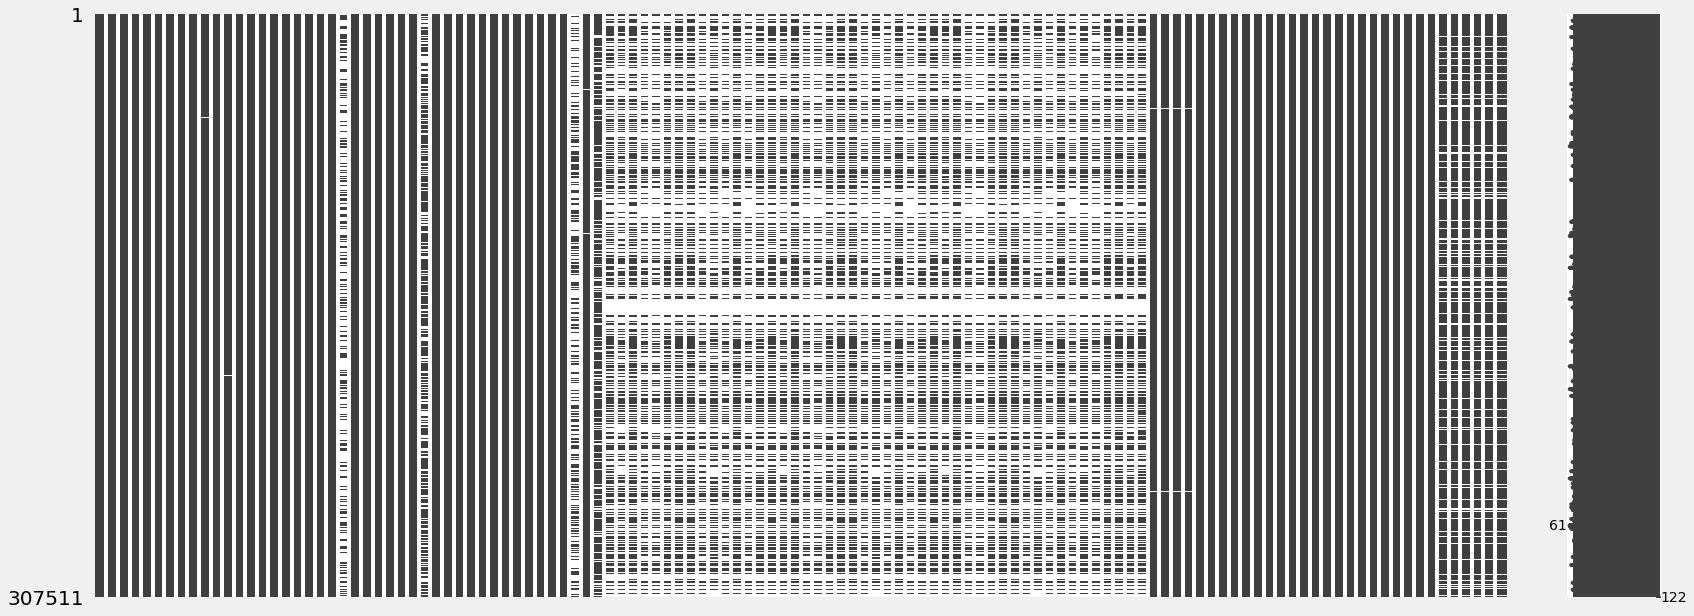

In [12]:
import missingno as mn
mn.matrix(application_df)

In [13]:
# %age null value in each column
round(application_df.isnull().sum()/application_df.shape[0]*100.00,2)

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
Length: 122, dtype: float64

#From the plot we can see the columns in which percentage of null values more than 40% are marked above the red line and the columns which have less than 40 % null values below the red line.
null

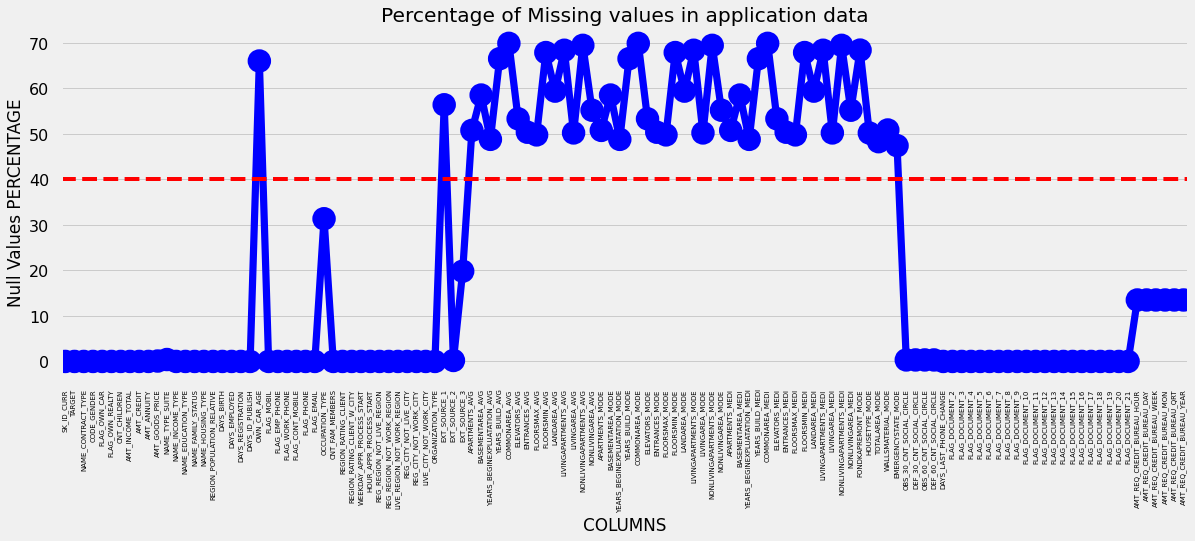

In [14]:
null_application_df = pd.DataFrame((application_df.isnull().sum())*100/application_df.shape[0]).reset_index()
null_application_df.columns = ['Column Name', 'Null Values Percentage']
fig = plt.figure(figsize=(18,6))
ax = sns.pointplot(x="Column Name",y="Null Values Percentage",data=null_application_df,color='blue')
plt.xticks(rotation =90,fontsize =7)
ax.axhline(40, ls='--',color='red')
plt.title("Percentage of Missing values in application data")
plt.ylabel("Null Values PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

In [15]:
null_40_application = null_application_df[null_application_df["Null Values Percentage"]>=40]
null_40_application

,Column Name,Null Values Percentage
21,OWN_CAR_AGE,65.990810
41,EXT_SOURCE_1,56.381073
44,APARTMENTS_AVG,50.749729
45,BASEMENTAREA_AVG,58.515956
46,YEARS_BEGINEXPLUATATION_AVG,48.781019
47,YEARS_BUILD_AVG,66.497784
48,COMMONAREA_AVG,69.872297
49,ELEVATORS_AVG,53.295980
50,ENTRANCES_AVG,50.348768
51,FLOORSMAX_AVG,49.760822


Total number of columns which have more than 40% null values

In [16]:
len(null_40_application)

49

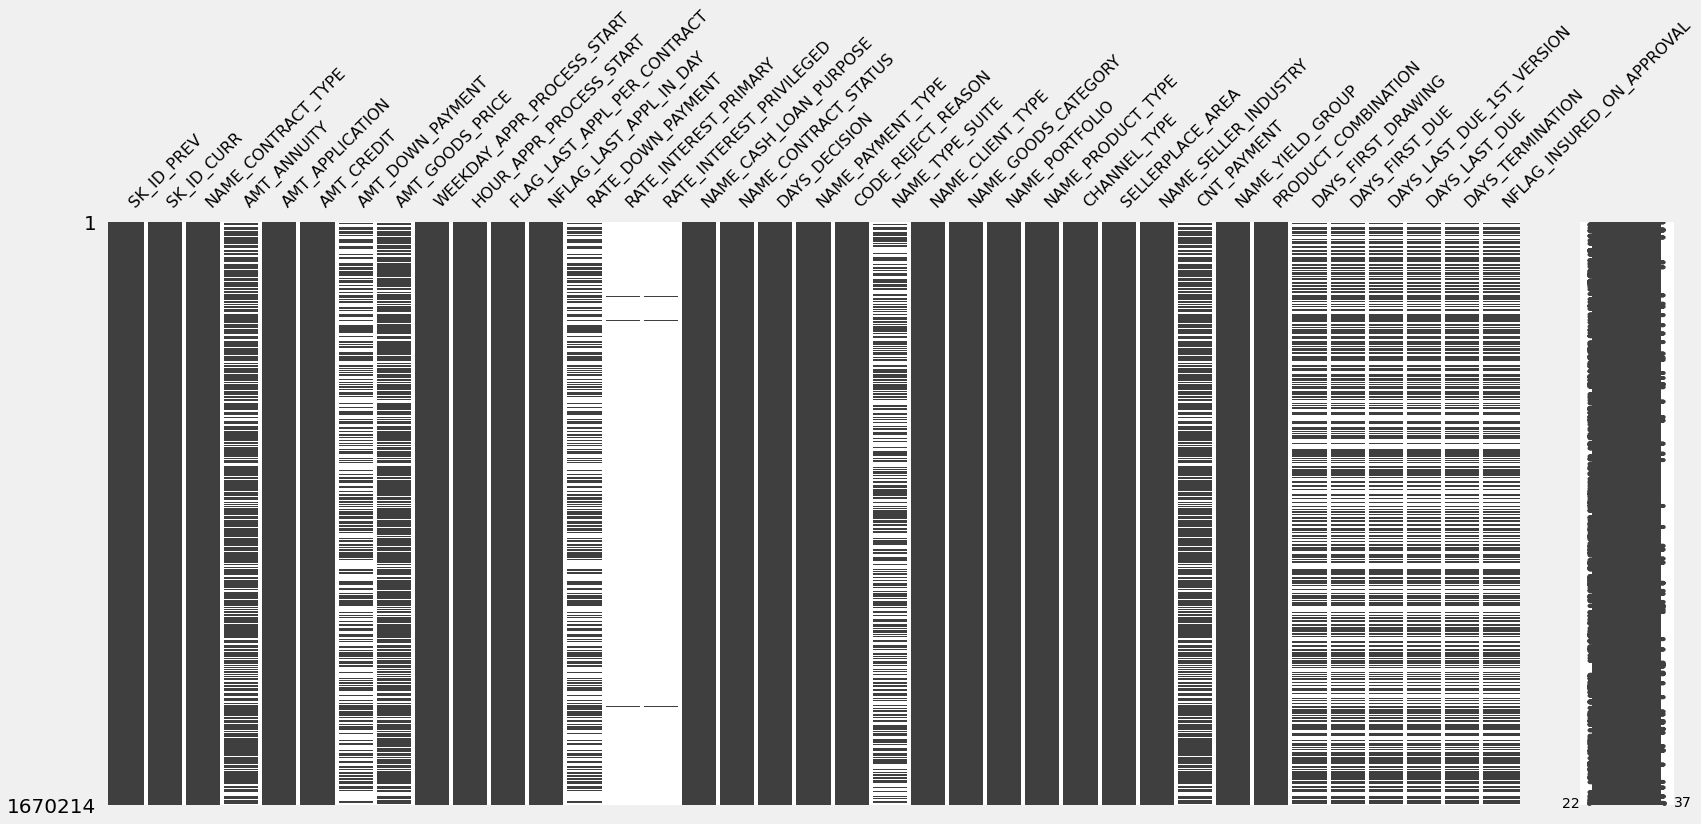

In [17]:
mn.matrix(previous_df)

In [18]:
round(previous_df.isnull().sum()/previous_df.shape[0] *100.00,2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

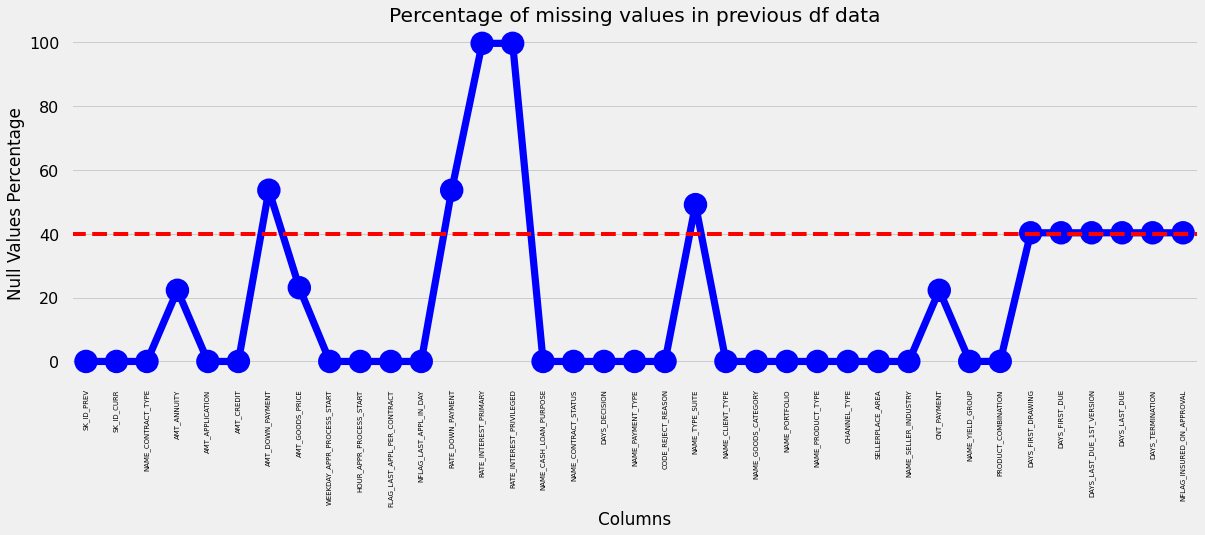

In [19]:
null_previous_df=pd.DataFrame((previous_df.isnull().sum())*100/previous_df.shape[0]).reset_index()
null_previous_df.columns=['Column Name','Null Values Percentage']
fig=plt.figure(figsize=(18,6))
ax=sns.pointplot(x='Column Name',y='Null Values Percentage',data=null_previous_df,color='blue')
plt.xticks(rotation=90,fontsize=7)
ax.axhline(40,ls='--',color='red')
plt.title('Percentage of missing values in previous df data')
plt.xlabel('Columns')
plt.ylabel('Null Values Percentage')
plt.show()

In [20]:
null_40_previous=null_previous_df[null_previous_df['Null Values Percentage']>=40]
null_40_previous

,Column Name,Null Values Percentage
6,AMT_DOWN_PAYMENT,53.636480
12,RATE_DOWN_PAYMENT,53.636480
13,RATE_INTEREST_PRIMARY,99.643698
14,RATE_INTEREST_PRIVILEGED,99.643698
20,NAME_TYPE_SUITE,49.119754
31,DAYS_FIRST_DRAWING,40.298129
32,DAYS_FIRST_DUE,40.298129
33,DAYS_LAST_DUE_1ST_VERSION,40.298129
34,DAYS_LAST_DUE,40.298129
35,DAYS_TERMINATION,40.298129


Total number of columns which have more than 40% missing values

In [21]:
len(null_40_previous)

11

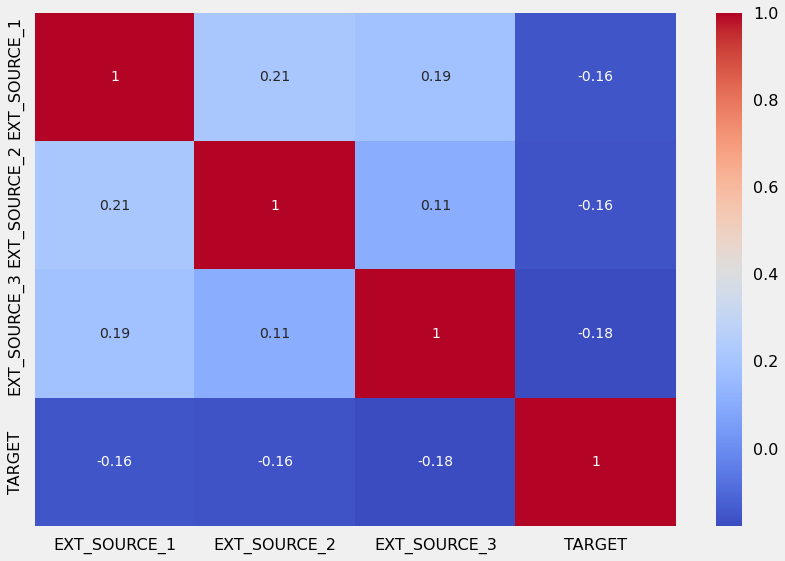

In [22]:
source=application_df[["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3","TARGET"]]
source_corr=source.corr()
ax=sns.heatmap(source_corr,xticklabels=source_corr.columns,yticklabels=source_corr.columns,annot=True,cmap="coolwarm")

INSIGHT: Based on the heatmap,we can see there is no correlation between EXT_SOURCE_1 and TARGET column thus we can drop these columns. EXT_SOURCE_1 has 56% null values whereas EXT_SOURCE_3 has 20% null values

In [23]:
#a 
Unwanted_application=null_40_application["Column Name"].tolist()+['EXT_SOURCE_2','EXT_SOURCE_3']
len(Unwanted_application)

51

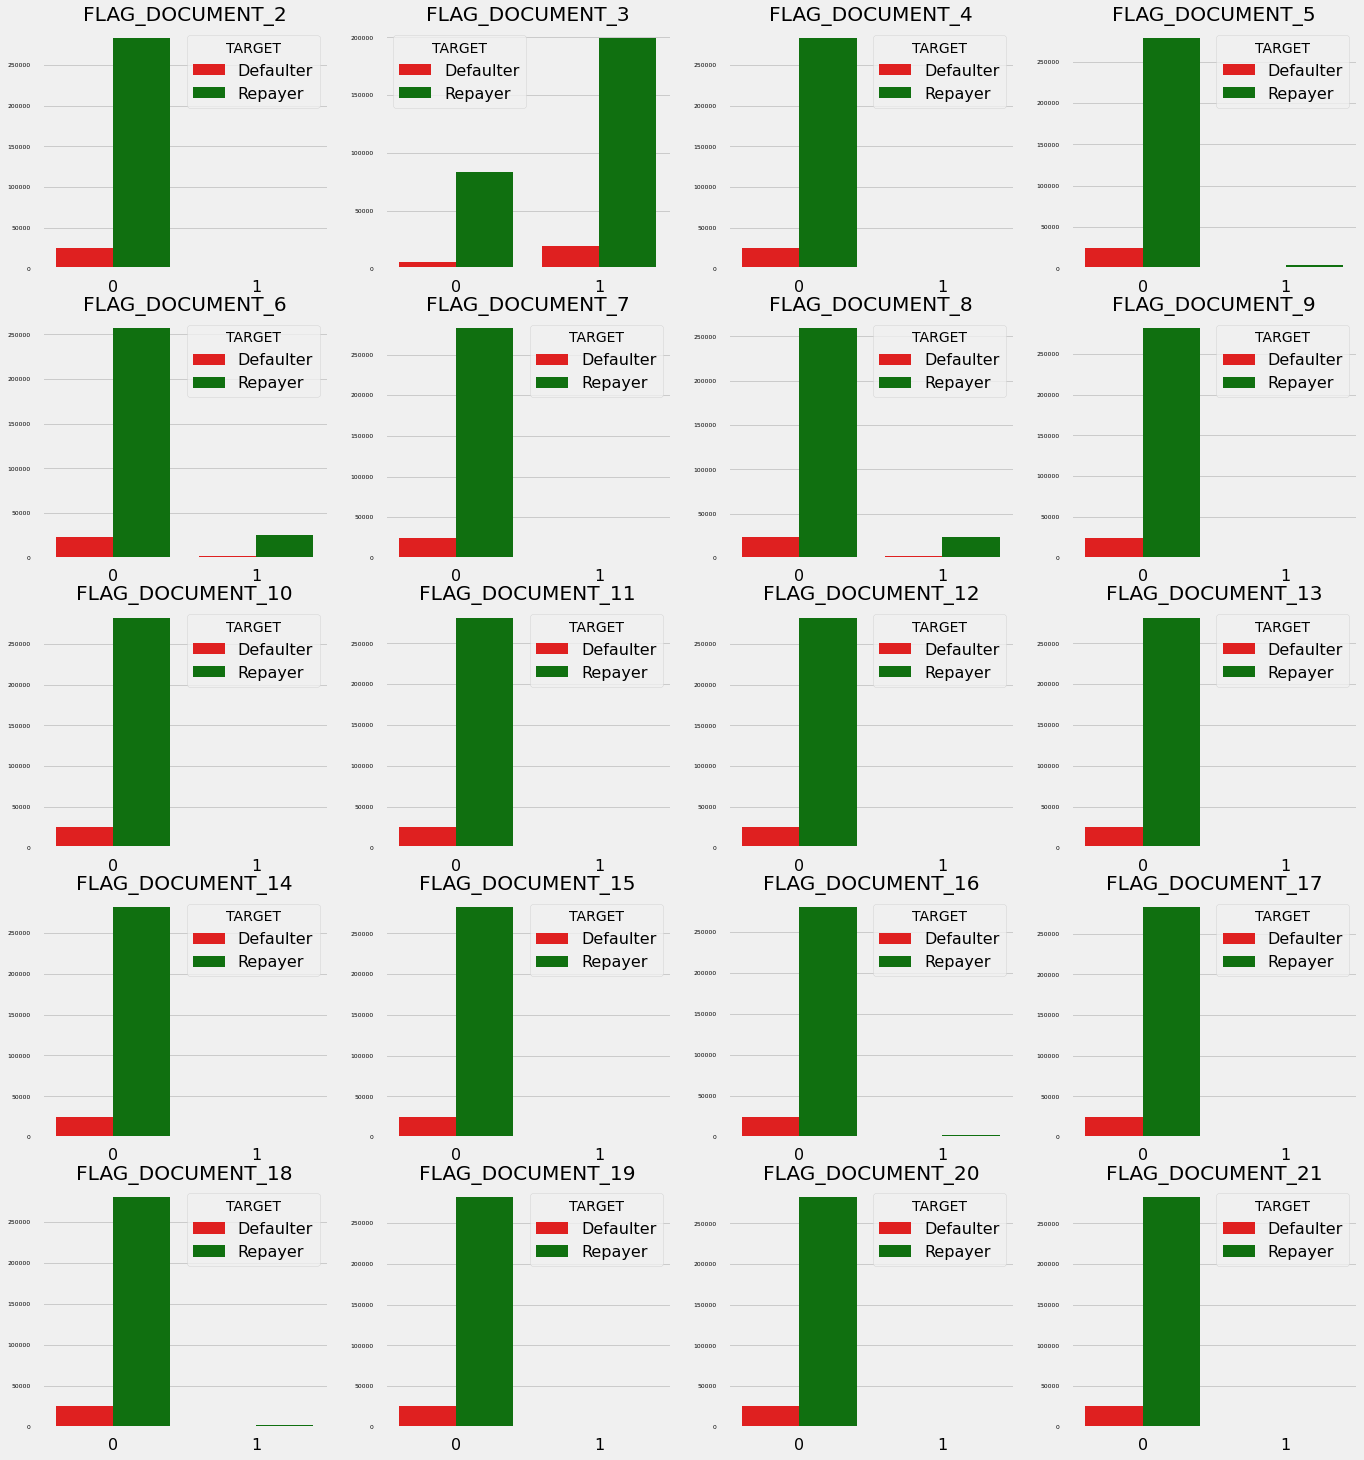

In [24]:
column_document=['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']
df_flag=application_df[column_document+["TARGET"]]
length = len(column_document)
df_flag["TARGET"]=df_flag["TARGET"].replace({1:"Defaulter",0:"Repayer"})
figure=plt.figure(figsize=(21,24))
for i,j in itertools.zip_longest(column_document,range(length)):
    plt.subplot(5,4,j+1)
    ax=sns.countplot(df_flag[i],hue=df_flag["TARGET"],palette=["r","g"])
    plt.yticks(fontsize=6)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

From the above graph, we came to know that if borrower has submitted FLAG_DOCUMENT_3 then there is a less chance of defaulting a loan .
The people who have applied for loans have not submitted FLAG_DOCUMENT_X except 3. Thus we can delete all columns except FLAG_DOCUMENT_3.

In [25]:
column_document.remove('FLAG_DOCUMENT_3')
Unwanted_application = Unwanted_application+column_document


In [26]:
len(Unwanted_application)

70

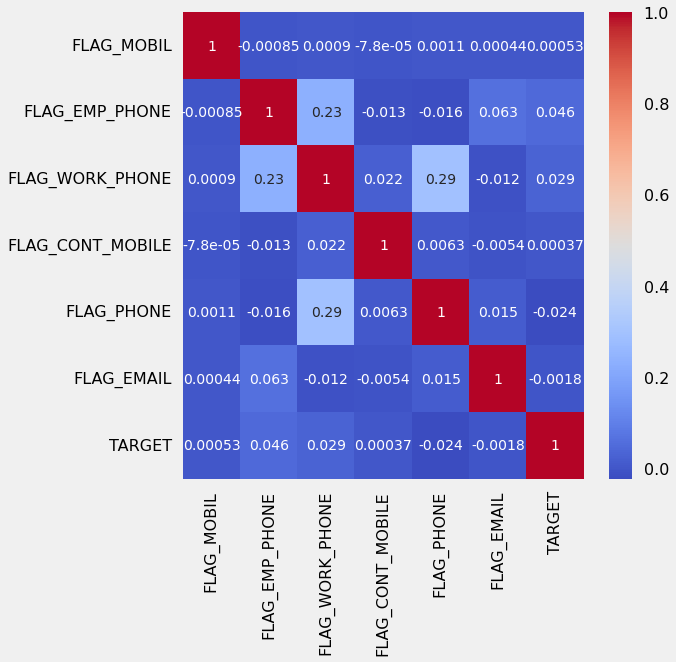

In [27]:
contact_column=['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','TARGET']
contact_correlation=application_df[contact_column].corr()
figure=plt.figure(figsize=(8,8))
ax=sns.heatmap(contact_correlation,xticklabels=contact_correlation.columns,yticklabels=contact_correlation.columns,annot=True,cmap="coolwarm")

There is no correlation between flags of mobile phone, email etc with loan replayment ; thus these columns can be deleted.

In [28]:
contact_column.remove('TARGET')
Unwanted_application = Unwanted_application + contact_column

In [29]:
len(Unwanted_application)

76

Total 76 column can be deleted from application df

In [30]:
application_df.drop(labels=Unwanted_application,axis=1,inplace=True)

In [31]:
application_df.shape

(307511, 46)

In [32]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [33]:
Unwanted_previous=null_40_previous["Column Name"].tolist()
Unwanted_previous

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [34]:
inessential_previous=['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']
Unwanted_previous=Unwanted_previous+inessential_previous
len(Unwanted_previous)

15

Total 15 columns can be deleted from previous df

In [35]:
previous_df.drop(labels=Unwanted_previous,axis=1,inplace=True)
previous_df.shape

(1670214, 22)

In [36]:
previous_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_PREV              1670214 non-null  int64  
 1   SK_ID_CURR              1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE      1670214 non-null  object 
 3   AMT_ANNUITY             1297979 non-null  float64
 4   AMT_APPLICATION         1670214 non-null  float64
 5   AMT_CREDIT              1670213 non-null  float64
 6   AMT_GOODS_PRICE         1284699 non-null  float64
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  object 
 8   NAME_CONTRACT_STATUS    1670214 non-null  object 
 9   DAYS_DECISION           1670214 non-null  int64  
 10  NAME_PAYMENT_TYPE       1670214 non-null  object 
 11  CODE_REJECT_REASON      1670214 non-null  object 
 12  NAME_CLIENT_TYPE        1670214 non-null  object 
 13  NAME_GOODS_CATEGORY     1670214 non-null  object 
 14  NA

Converting negative days to positive days

In [37]:
date_column = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']
for i in date_column:
    application_df[i]=abs(application_df[i])

In [38]:
application_df['AMT_INCOME_TOTAL']=application_df['AMT_INCOME_TOTAL']/100000
bins=[0,1,2,3,4,5,6,7,8,9,10,11]
slot=['0-100K','100K-200K','200K-300K','300K-400K','400K-500K','500K-600K','600K-700K','700K-800K','800K-900K','900K-1M','1M Above']
application_df['AMT_INCOME_RANGE']=pd.cut(application_df['AMT_INCOME_TOTAL'],bins,labels=slot)

In [39]:
application_df['AMT_INCOME_RANGE'].value_counts(normalize=True)*100

100K-200K    50.735000
200K-300K    21.210691
0-100K       20.729695
300K-400K     4.776116
400K-500K     1.744669
500K-600K     0.356354
600K-700K     0.282805
800K-900K     0.096980
700K-800K     0.052721
900K-1M       0.009112
1M Above      0.005858
Name: AMT_INCOME_RANGE, dtype: float64

Approx 91% people have income of less than 300K

In [40]:
application_df['AMT_CREDIT']=application_df['AMT_CREDIT']/100000
bins=[0,1,2,3,4,5,6,7,8,9,10,100]
slots=['0-100K','100K-200K','200K-300K','300K-400K','400K-500K','500K-600K','600K-700K','700K-800K','800K-900K','900K-1M','1M Above']
application_df['AMT_CREDIT_RANGE']=pd.cut(application_df['AMT_CREDIT'],bins,labels=slots)

In [41]:
application_df['AMT_CREDIT_RANGE'].value_counts(normalize=True)*100

200K-300K    17.824728
1M Above     16.254703
500K-600K    11.131960
400K-500K    10.418489
100K-200K     9.801275
300K-400K     8.564897
600K-700K     7.820533
800K-900K     7.086576
700K-800K     6.241403
900K-1M       2.902986
0-100K        1.952450
Name: AMT_CREDIT_RANGE, dtype: float64

Approx 16% people have taken loan of amount above 1M 

In [42]:
application_df['AGE']=application_df['DAYS_BIRTH']//365
bins=[0,20,30,40,50,100]
slots=['0-20','20-30','30-40','40-50','50 above']
application_df['AGE_GROUP']=pd.cut(application_df['AGE'],bins,labels=slots)

In [43]:
application_df['AGE_GROUP'].value_counts(normalize=True)*100

50 above    31.604398
30-40       27.028952
40-50       24.194582
20-30       17.171743
0-20         0.000325
Name: AGE_GROUP, dtype: float64

31% people applying for loan are above 50

In [44]:
application_df['YEARS_EMPLOYED']=application_df['DAYS_EMPLOYED']//365
bins=[0,5,10,20,30,40,50,60,150]
slots=['0-5','5-10','10-20','20-30','30-40','40-50','50-60','60 above']
application_df['EMPLOYMENT_YEAR']=pd.cut(application_df['YEARS_EMPLOYED'],bins,labels=slots)

In [45]:
application_df['EMPLOYMENT_YEAR'].value_counts(normalize=True)*100

0-5         55.582363
5-10        24.966441
10-20       14.564315
20-30        3.750117
30-40        1.058720
40-50        0.078044
50-60        0.000000
60 above     0.000000
Name: EMPLOYMENT_YEAR, dtype: float64

Approx 55% people have work experience of 0 to 5 years only

In [46]:
application_df.nunique().sort_values()

LIVE_CITY_NOT_WORK_CITY             2
TARGET                              2
NAME_CONTRACT_TYPE                  2
REG_REGION_NOT_LIVE_REGION          2
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
FLAG_DOCUMENT_3                     2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
REGION_RATING_CLIENT                3
CODE_GENDER                         3
REGION_RATING_CLIENT_W_CITY         3
AMT_REQ_CREDIT_BUREAU_HOUR          5
NAME_EDUCATION_TYPE                 5
AGE_GROUP                           5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
EMPLOYMENT_YEAR                     6
WEEKDAY_APPR_PROCESS_START          7
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
AMT_REQ_CREDIT_BUREAU_WEEK          9
AMT_REQ_CREDIT_BUREAU_DAY           9
DEF_60_CNT_SOCIAL_CIRCLE            9
DEF_30_CNT_S

In [47]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

In [48]:
categorical_column=['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT','WEEKDAY_APPR_PROCESS_START','REGION_RATING_CLIENT_W_CITY']

for i in categorical_column:
    application_df[i]=pd.Categorical(application_df[i])

In [49]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  category
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

In [50]:
previous_df.nunique().sort_values()

NAME_PRODUCT_TYPE               3
NAME_PAYMENT_TYPE               4
NAME_CONTRACT_TYPE              4
NAME_CLIENT_TYPE                4
NAME_CONTRACT_STATUS            4
NAME_PORTFOLIO                  5
NAME_YIELD_GROUP                5
CHANNEL_TYPE                    8
CODE_REJECT_REASON              9
NAME_SELLER_INDUSTRY           11
PRODUCT_COMBINATION            17
NAME_CASH_LOAN_PURPOSE         25
NAME_GOODS_CATEGORY            28
CNT_PAYMENT                    49
SELLERPLACE_AREA             2097
DAYS_DECISION                2922
AMT_CREDIT                  86803
AMT_GOODS_PRICE             93885
AMT_APPLICATION             93885
SK_ID_CURR                 338857
AMT_ANNUITY                357959
SK_ID_PREV                1670214
dtype: int64

In [51]:
previous_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_PREV              1670214 non-null  int64  
 1   SK_ID_CURR              1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE      1670214 non-null  object 
 3   AMT_ANNUITY             1297979 non-null  float64
 4   AMT_APPLICATION         1670214 non-null  float64
 5   AMT_CREDIT              1670213 non-null  float64
 6   AMT_GOODS_PRICE         1284699 non-null  float64
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  object 
 8   NAME_CONTRACT_STATUS    1670214 non-null  object 
 9   DAYS_DECISION           1670214 non-null  int64  
 10  NAME_PAYMENT_TYPE       1670214 non-null  object 
 11  CODE_REJECT_REASON      1670214 non-null  object 
 12  NAME_CLIENT_TYPE        1670214 non-null  object 
 13  NAME_GOODS_CATEGORY     1670214 non-null  object 
 14  NA

In [52]:
previous_df['DAYS_DECISION']=abs(previous_df['DAYS_DECISION'])

In [53]:
previous_df['DAYS_DECISION_GROUP']=(previous_df['DAYS_DECISION']-(previous_df['DAYS_DECISION']%400)).astype(str)+'-'+((previous_df['DAYS_DECISION']-(previous_df['DAYS_DECISION']%400))+(previous_df['DAYS_DECISION']%400)+(400-(previous_df['DAYS_DECISION']%400))).astype(str)

In [54]:
previous_df['DAYS_DECISION_GROUP'].value_counts(normalize=True)*100

0-400        37.490525
400-800      22.944724
800-1200     12.444753
1200-1600     7.904556
2400-2800     6.297456
1600-2000     5.795784
2000-2400     5.684960
2800-3200     1.437241
Name: DAYS_DECISION_GROUP, dtype: float64

Approx 37% people have applied for loan within 400 days of previous loan decision.

In [55]:
Catgorical_column = ['NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE','CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO','NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION','NAME_CONTRACT_TYPE','DAYS_DECISION_GROUP']

for i in Catgorical_column:
    previous_df[i] =pd.Categorical(previous_df[i])

In [56]:
previous_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 23 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   SK_ID_PREV              1670214 non-null  int64   
 1   SK_ID_CURR              1670214 non-null  int64   
 2   NAME_CONTRACT_TYPE      1670214 non-null  category
 3   AMT_ANNUITY             1297979 non-null  float64 
 4   AMT_APPLICATION         1670214 non-null  float64 
 5   AMT_CREDIT              1670213 non-null  float64 
 6   AMT_GOODS_PRICE         1284699 non-null  float64 
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  category
 8   NAME_CONTRACT_STATUS    1670214 non-null  category
 9   DAYS_DECISION           1670214 non-null  int64   
 10  NAME_PAYMENT_TYPE       1670214 non-null  category
 11  CODE_REJECT_REASON      1670214 non-null  category
 12  NAME_CLIENT_TYPE        1670214 non-null  category
 13  NAME_GOODS_CATEGORY     1670214 non-null  

Imputing Null values in application_df

. If the null values in categorical variables has lower null %age then mode() is used to impute the most frequent items.

. The ones with high null %age , a new category is created to impute those.

. To impute null values in numerical variables which has lower null %age medan is used .

In [57]:
round(application_df.isnull().sum()/application_df.shape[0] *100,2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
OCCUPATION_TYPE                31.35
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
R

Imputing NAME_TYPE_SUITE

In [58]:
application_df['NAME_TYPE_SUITE'].describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

In [59]:
application_df['NAME_TYPE_SUITE'].fillna((application_df['NAME_TYPE_SUITE'].mode()[0]),inplace=True)

In [60]:
application_df[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].describe()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


Imputing with median as mean has decimals

In [61]:
amt=['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']

for col in amt:
    application_df[col].fillna(application_df[col].median(),inplace=True)

In [62]:
round(application_df.isnull().sum()/previous_df.shape[0]*100,2)

SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
AMT_GOODS_PRICE                0.02
NAME_TYPE_SUITE                0.00
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
REGION_POPULATION_RELATIVE     0.00
DAYS_BIRTH                     0.00
DAYS_EMPLOYED                  0.00
DAYS_REGISTRATION              0.00
DAYS_ID_PUBLISH                0.00
OCCUPATION_TYPE                5.77
CNT_FAM_MEMBERS                0.00
REGION_RATING_CLIENT           0.00
REGION_RATING_CLIENT_W_CITY    0.00
WEEKDAY_APPR_PROCESS_START     0.00
HOUR_APPR_PROCESS_START        0.00
REG_REGION_NOT_LIVE_REGION  

Since the %age in the columns :  AMT_GOODS_PRICE, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE is very less , we can ignore these.

Imputing Null Values in previous_df

. To impute null values in numerical column, we analyse the loan status.

. To impute null values in continuous variables, we plot the distribution of the columns and used
       
      median if the distribution is skewed.
      mode if the distribution pattern is preserved.

In [63]:
round(previous_df.isnull().sum()/previous_df.shape[0]*100,2)

SK_ID_PREV                 0.00
SK_ID_CURR                 0.00
NAME_CONTRACT_TYPE         0.00
AMT_ANNUITY               22.29
AMT_APPLICATION            0.00
AMT_CREDIT                 0.00
AMT_GOODS_PRICE           23.08
NAME_CASH_LOAN_PURPOSE     0.00
NAME_CONTRACT_STATUS       0.00
DAYS_DECISION              0.00
NAME_PAYMENT_TYPE          0.00
CODE_REJECT_REASON         0.00
NAME_CLIENT_TYPE           0.00
NAME_GOODS_CATEGORY        0.00
NAME_PORTFOLIO             0.00
NAME_PRODUCT_TYPE          0.00
CHANNEL_TYPE               0.00
SELLERPLACE_AREA           0.00
NAME_SELLER_INDUSTRY       0.00
CNT_PAYMENT               22.29
NAME_YIELD_GROUP           0.00
PRODUCT_COMBINATION        0.02
DAYS_DECISION_GROUP        0.00
dtype: float64

Imputing AMT_ANNUITY with median since the destribution is greatly skewed.

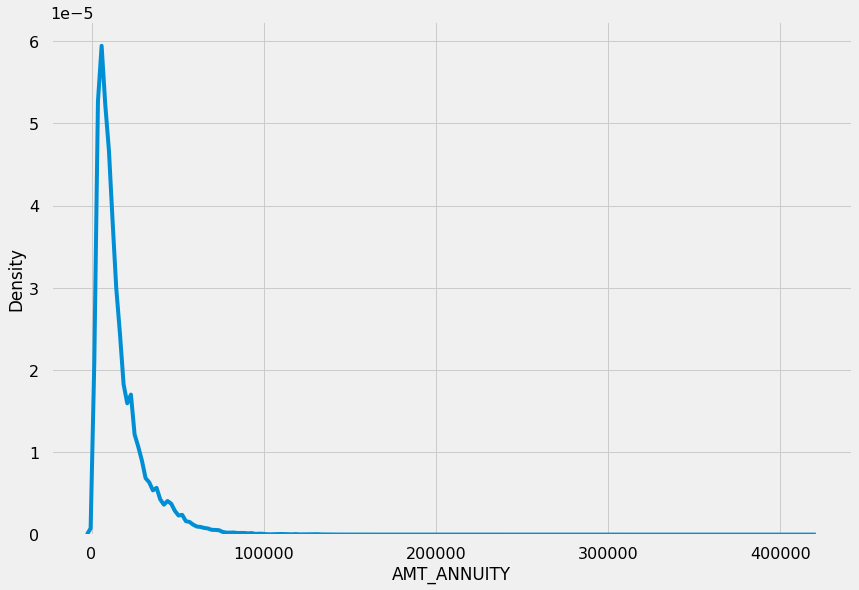

In [64]:
sns.kdeplot(previous_df['AMT_ANNUITY'])
plt.show()

The figure shows it has outliers therefore using mean is not recommended , use median instead.

In [65]:
previous_df['AMT_ANNUITY'].fillna(previous_df['AMT_ANNUITY'].median(),inplace=True)

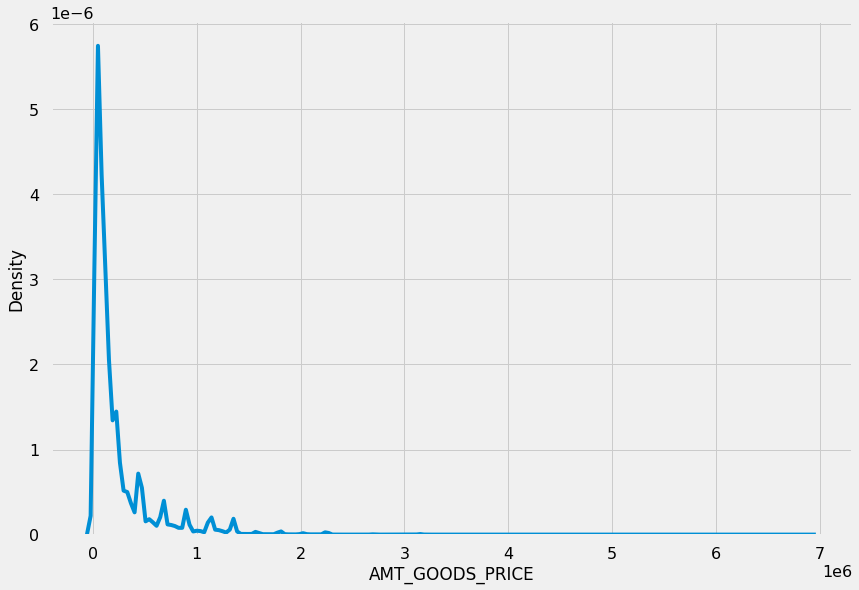

In [66]:
sns.kdeplot(previous_df['AMT_GOODS_PRICE'][pd.notnull(previous_df['AMT_GOODS_PRICE'])])
plt.show()

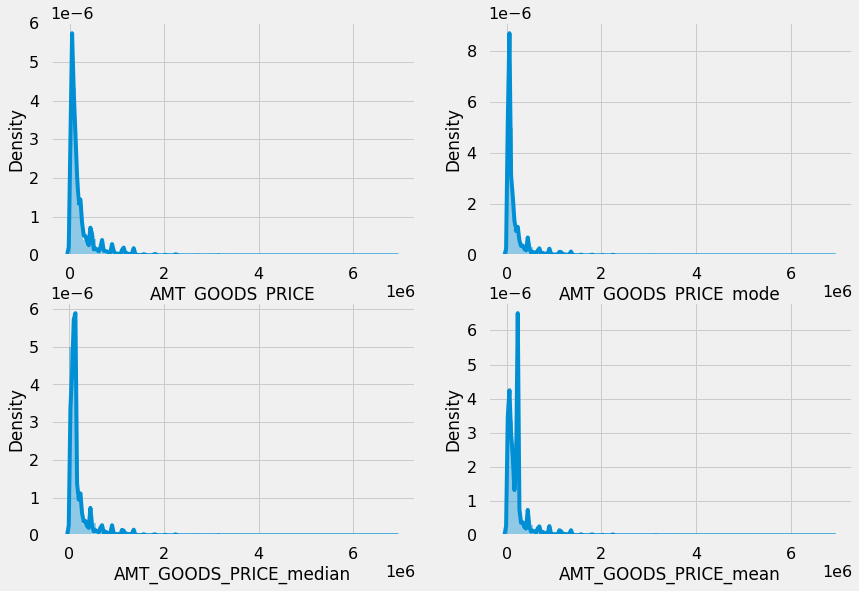

In [67]:
stats=pd.DataFrame()
stats['AMT_GOODS_PRICE_mode']=previous_df['AMT_GOODS_PRICE'].fillna(previous_df['AMT_GOODS_PRICE'].mode()[0])
stats['AMT_GOODS_PRICE_median']=previous_df['AMT_GOODS_PRICE'].fillna(previous_df['AMT_GOODS_PRICE'].median())
stats['AMT_GOODS_PRICE_mean']=previous_df['AMT_GOODS_PRICE'].fillna(previous_df['AMT_GOODS_PRICE'].mean())

columns=['AMT_GOODS_PRICE_mode', 'AMT_GOODS_PRICE_median', 'AMT_GOODS_PRICE_mean']

plt.subplot(2,2,1)
sns.distplot(previous_df['AMT_GOODS_PRICE'][pd.notnull(previous_df['AMT_GOODS_PRICE'])])

for i in enumerate(columns):
    plt.subplot(2,2,i[0]+2)
    sns.distplot(stats[i[1]])

The original destribution is closer with the destribution of data imputed with mode .

In [68]:
previous_df['AMT_GOODS_PRICE'].fillna(previous_df['AMT_GOODS_PRICE'].mode()[0],inplace=True)

In [69]:
previous_df.loc[previous_df['CNT_PAYMENT'].isnull(),'NAME_CONTRACT_STATUS'].value_counts()

Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
Name: NAME_CONTRACT_STATUS, dtype: int64

In [70]:
previous_df['CNT_PAYMENT'].fillna(0,inplace=True)

In [71]:
round(previous_df.isnull().sum()/previous_df.shape[0]*100,2)

SK_ID_PREV                0.00
SK_ID_CURR                0.00
NAME_CONTRACT_TYPE        0.00
AMT_ANNUITY               0.00
AMT_APPLICATION           0.00
AMT_CREDIT                0.00
AMT_GOODS_PRICE           0.00
NAME_CASH_LOAN_PURPOSE    0.00
NAME_CONTRACT_STATUS      0.00
DAYS_DECISION             0.00
NAME_PAYMENT_TYPE         0.00
CODE_REJECT_REASON        0.00
NAME_CLIENT_TYPE          0.00
NAME_GOODS_CATEGORY       0.00
NAME_PORTFOLIO            0.00
NAME_PRODUCT_TYPE         0.00
CHANNEL_TYPE              0.00
SELLERPLACE_AREA          0.00
NAME_SELLER_INDUSTRY      0.00
CNT_PAYMENT               0.00
NAME_YIELD_GROUP          0.00
PRODUCT_COMBINATION       0.02
DAYS_DECISION_GROUP       0.00
dtype: float64

We can ignore PRODUCT_COMBINATION column since the %age is very less.

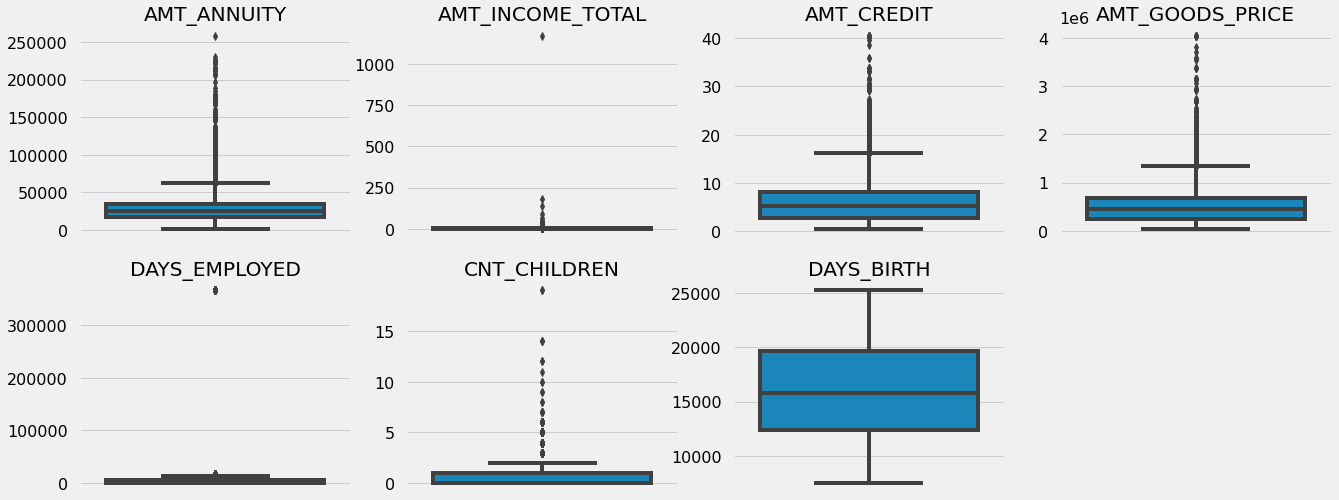

In [72]:
plt.figure(figsize=(20,8))

outlier_column_1=['AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_EMPLOYED']
outlier_column_2=['CNT_CHILDREN','DAYS_BIRTH']

for i in enumerate(outlier_column_1):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=application_df[i[1]])
    plt.title(i[1])
    plt.ylabel("")
    
for i in enumerate(outlier_column_2):
    plt.subplot(2,4,i[0]+6)
    sns.boxplot(y=application_df[i[1]])
    plt.title(i[1])
    plt.ylabel("")

DAYS_BIRTH has no outliers.

DAYS_EMPLOYED has outlier values around 957 years which is impossible therefore it is incorrect entry.

In [73]:
application_df[['AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_BIRTH','CNT_CHILDREN','DAYS_EMPLOYED']].describe().T

,count,mean,std,min,25%,50%,75%,max
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1615.5000,16524.000,24903.00000,34596.0000,258025.5
AMT_INCOME_TOTAL,307511.0,1.687979,2.371231,0.2565,1.125,1.47150,2.0250,1170.0
AMT_CREDIT,307511.0,5.990260,4.024908,0.4500,2.700,5.13531,8.0865,40.5
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,40500.0000,238500.000,450000.00000,679500.0000,4050000.0
DAYS_BIRTH,307511.0,16036.995067,4363.988632,7489.0000,12413.000,15750.00000,19682.0000,25229.0
CNT_CHILDREN,307511.0,0.417052,0.722121,0.0000,0.000,0.00000,1.0000,19.0
DAYS_EMPLOYED,307511.0,67724.742149,139443.751806,0.0000,933.000,2219.00000,5707.0000,365243.0


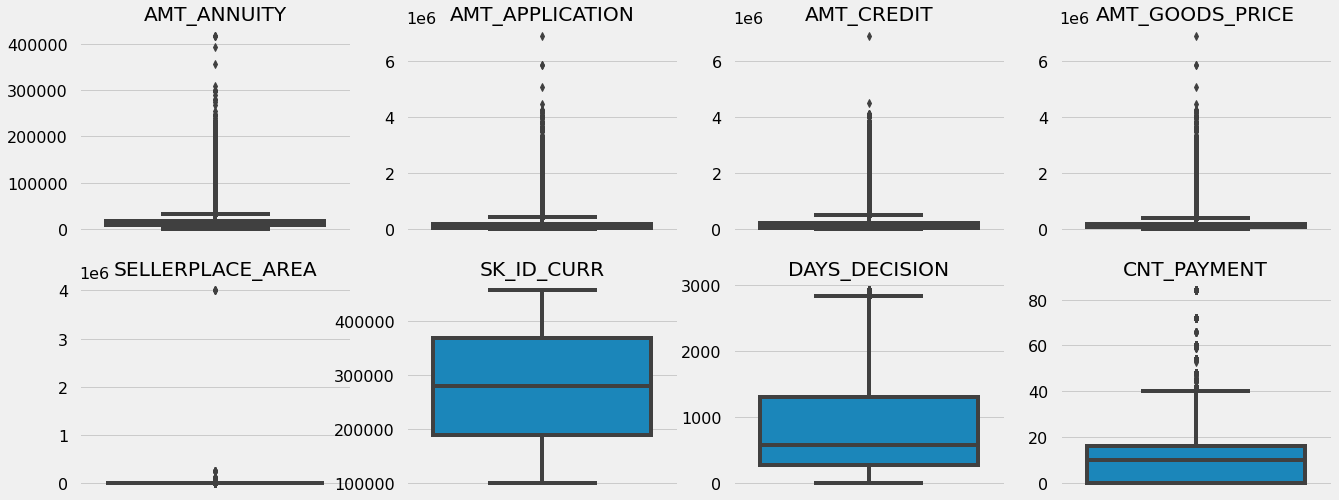

In [74]:
plt.figure(figsize=(20,8))

previous_outlier_column_1=['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','SELLERPLACE_AREA']
previous_outlier_column_2=['SK_ID_CURR','DAYS_DECISION','CNT_PAYMENT']

for i in enumerate(previous_outlier_column_1):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=previous_df[i[1]])
    plt.title(i[1])
    plt.ylabel("")
    
for i in enumerate(previous_outlier_column_2):
    plt.subplot(2,4,i[0]+6)
    sns.boxplot(y=previous_df[i[1]])
    plt.title(i[1])
    plt.ylabel("")

SK_ID_CURR has no outliers.

AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE, SELLERPLACE_AREA have huge number of outliers.

In [75]:
previous_df[['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'SELLERPLACE_AREA','CNT_PAYMENT','DAYS_DECISION']].describe().T

,count,mean,std,min,25%,50%,75%,max
AMT_ANNUITY,1670214.0,14906.506177,13177.514097,0.0,7547.09625,11250.0,16824.02625,418058.145
AMT_APPLICATION,1670214.0,175233.860360,292779.762387,0.0,18720.00000,71046.0,180360.00000,6905160.000
AMT_CREDIT,1670213.0,196114.021218,318574.616546,0.0,24160.50000,80541.0,216418.50000,6905160.000
AMT_GOODS_PRICE,1670214.0,185642.885791,287141.316091,0.0,45000.00000,71050.5,180405.00000,6905160.000
SELLERPLACE_AREA,1670214.0,313.951115,7127.443459,-1.0,-1.00000,3.0,82.00000,4000000.000
CNT_PAYMENT,1670214.0,12.476210,14.475882,0.0,0.00000,10.0,16.00000,84.000
DAYS_DECISION,1670214.0,880.679668,779.099667,1.0,280.00000,581.0,1300.00000,2922.000


Text(0.5, 1.0, 'Imbalance plotting')

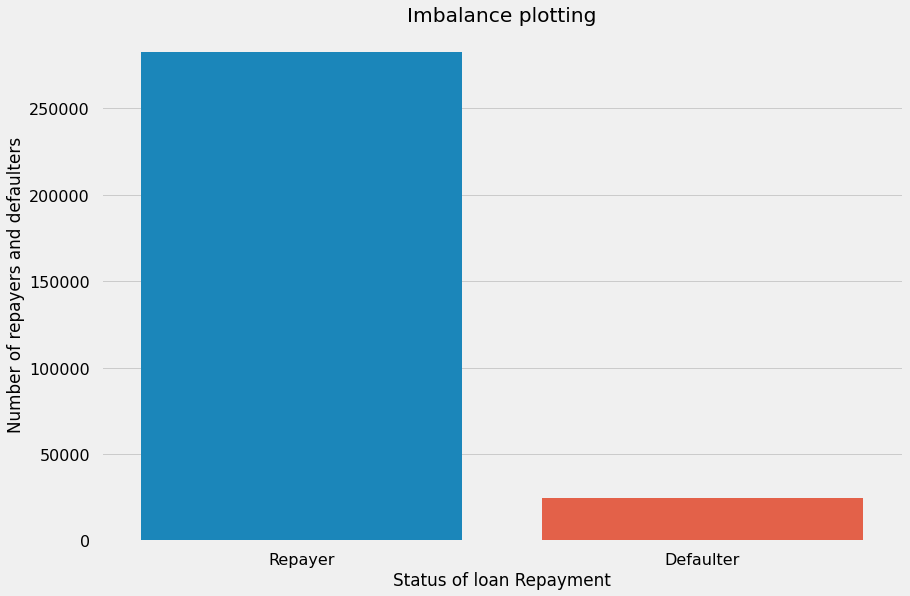

In [76]:
imbalance=application_df['TARGET'].value_counts().reset_index()

x=['Repayer','Defaulter']
sns.barplot(x,'TARGET',data=imbalance)
plt.xlabel("Status of loan Repayment")
plt.ylabel("Number of repayers and defaulters")
plt.title("Imbalance plotting")

In [77]:
count_1 = imbalance.iloc[0]["TARGET"]
count_2 = imbalance.iloc[1]["TARGET"]
count_perc_1 = round(count_1/(count_1+count_2)*100,2)
count_perc_2 = round(count_2/(count_1+count_2)*100,2)

print('Ratios of imbalance in percentage w.r.t. Repayer and Defaulter are: %.2f and %.2f'%(count_perc_1,count_perc_2))
print('Ratios of imbalance in relative w.r.t Repayer and Defaulter is %.2f : 1'%(count_1/count_2))

Ratios of imbalance in percentage w.r.t. Repayer and Defaulter are: 91.93 and 8.07
Ratios of imbalance in relative w.r.t Repayer and Defaulter is 11.39 : 1


In [78]:
def univariate_categorical(feature,ylog=False,label_rotation=False,horizontal_layout=True):
    temp = application_df[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})
    categorical_perc = application_df[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    categorical_perc["TARGET"] = categorical_perc["TARGET"]*100
    categorical_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20,24))
    s = sns.countplot(ax=ax1, 
                    x = feature, 
                    data=application_df,
                    hue ="TARGET",
                    order=categorical_perc[feature],
                    palette=['g','r'])
    ax1.set_title(feature, fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'}) 
    ax1.legend(['Repayer','Defaulter'])
    
    if ylog:
        ax1.set_yscale('log')
        ax1.set_ylabel("Count (log)",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'}) 
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    
    s = sns.barplot(ax=ax2, 
                    x = feature, 
                    y='TARGET', 
                    order=categorical_perc[feature], 
                    data=categorical_perc)
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of Defaulters [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    ax2.set_title(feature + " Defaulter %", fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 

    plt.show()

In [79]:
def bivariate_bar(x,y,df,hue,figsize):
    
    plt.figure(figsize=figsize)
    sns.barplot(x=x,
                  y=y,
                  data=df, 
                  hue=hue)
    plt.xlabel(x,fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})    
    plt.ylabel(y,fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})    
    plt.title(col, fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    plt.xticks(rotation=90, ha='right')
    plt.legend(labels = ['Repayer','Defaulter'])
    plt.show()

In [80]:
def bivariate_rel(x,y,data, hue, kind, palette, legend,figsize):
    
    plt.figure(figsize=figsize)
    sns.relplot(x=x, 
                y=y, 
                data=application_df, 
                hue="TARGET",
                kind=kind,
                palette = ['g','r'],
                legend = False)
    plt.legend(['Repayer','Defaulter'])
    plt.xticks(rotation=90, ha='right')
    plt.show()

In [81]:
def univariate_merged(col,df,hue,palette,ylog,figsize):
    plt.figure(figsize=figsize)
    ax=sns.countplot(x=col, 
                  data=df,
                  hue= hue,
                  palette= palette,
                  order=df[col].value_counts().index)
    

    if ylog:
        plt.yscale('log')
        plt.ylabel("Count (log)",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})     
    else:
        plt.ylabel("Count",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})       

    plt.title(col , fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    plt.legend(loc = "upper right")
    plt.xticks(rotation=90, ha='right')
    
    plt.show()

In [82]:
def merged_pointplot(x,y):
    plt.figure(figsize=(8,4))
    sns.pointplot(x=x, 
                  y=y, 
                  hue="TARGET", 
                  data=loan_df)

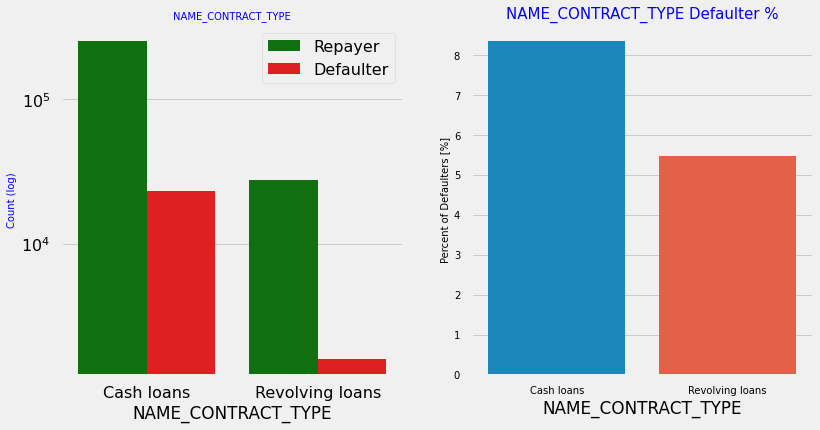

In [83]:
univariate_categorical('NAME_CONTRACT_TYPE',True)

                                INFERENCES

A larger amount of Revolving loans, comparing with their frequency, are not repaid.

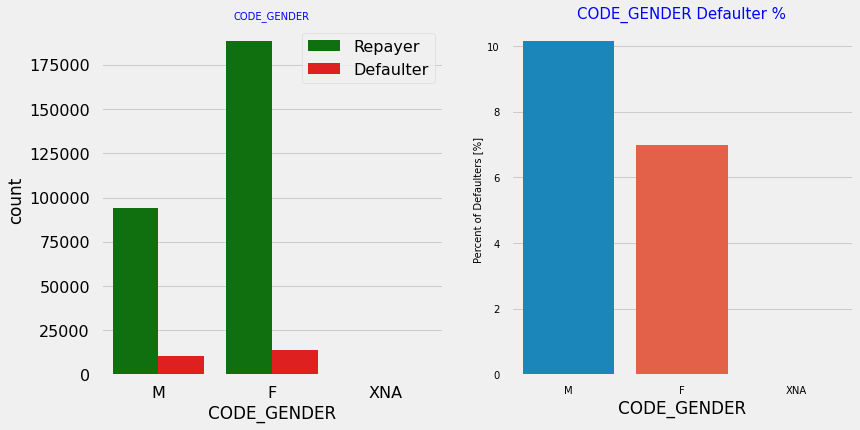

In [84]:
univariate_categorical('CODE_GENDER')

                                INFERENCES

The number of female clients is almost double the number of male clients.

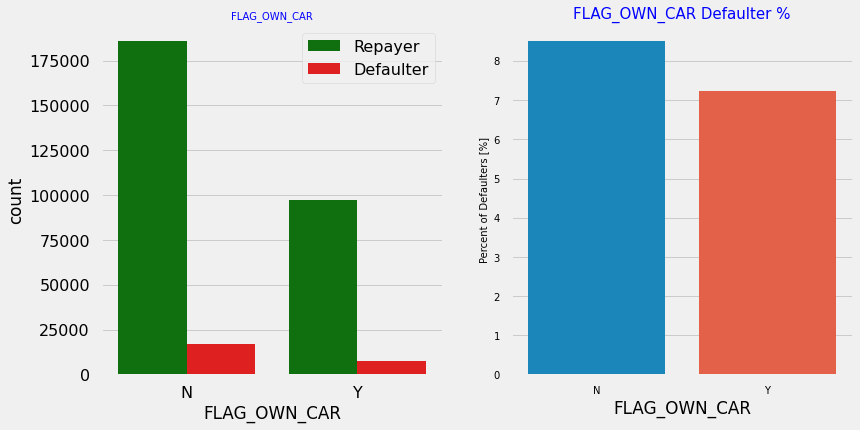

In [85]:
univariate_categorical('FLAG_OWN_CAR')

                                INFERENCES

Clients who own a car are half in number of the client who do not.
There is no correlation between owning a car and loan repayment as in both cases default %age is same 

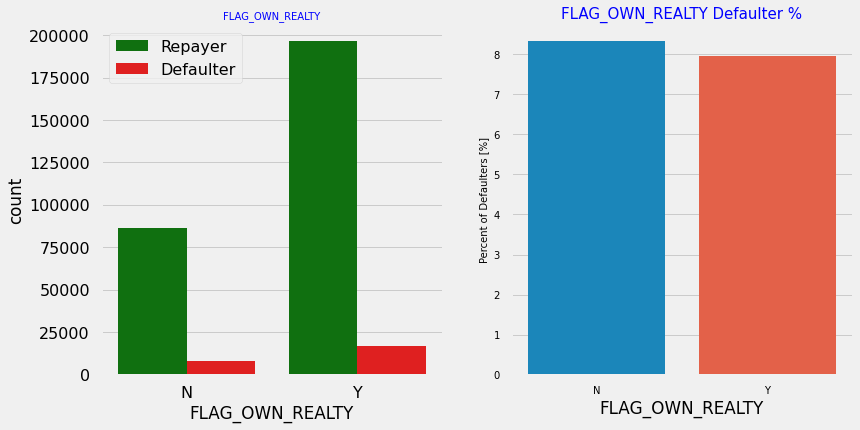

In [86]:
univariate_categorical('FLAG_OWN_REALTY')

                                 INFERENCES

The clients who own a real estate are more than double of the ones that do not. 

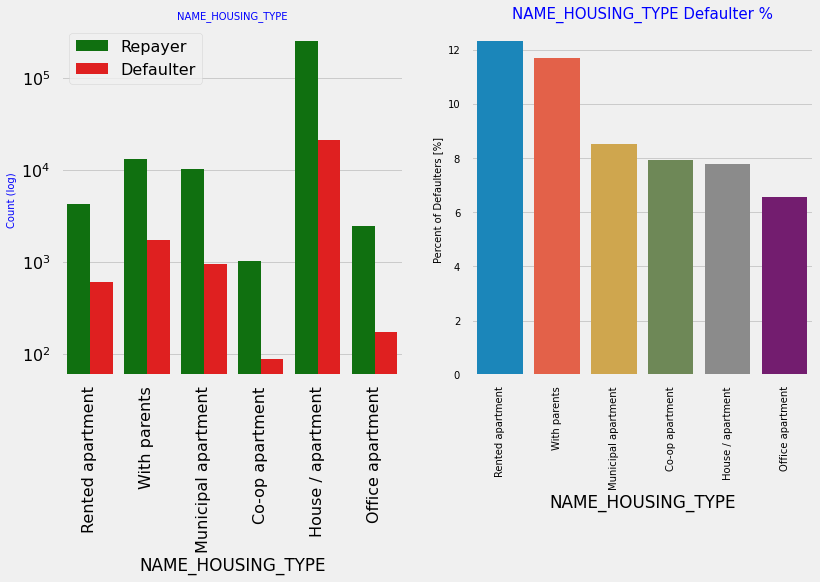

In [87]:
univariate_categorical("NAME_HOUSING_TYPE",True,True,True)

                            INFERENCES

Majority of people live in house.
Lowest default rates are of those who live in office appartments.

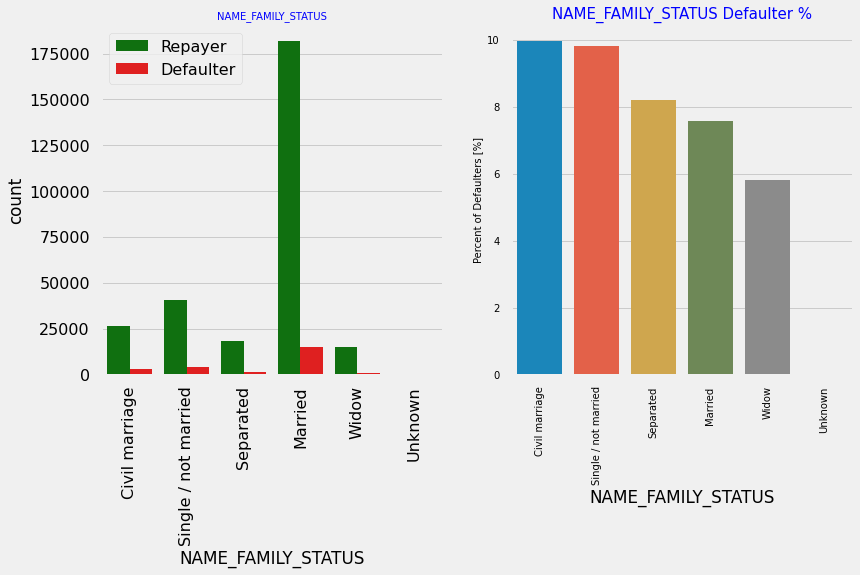

In [88]:
univariate_categorical("NAME_FAMILY_STATUS",False,True,True)

                                   INFERENCES

Most of the people with loan are married .

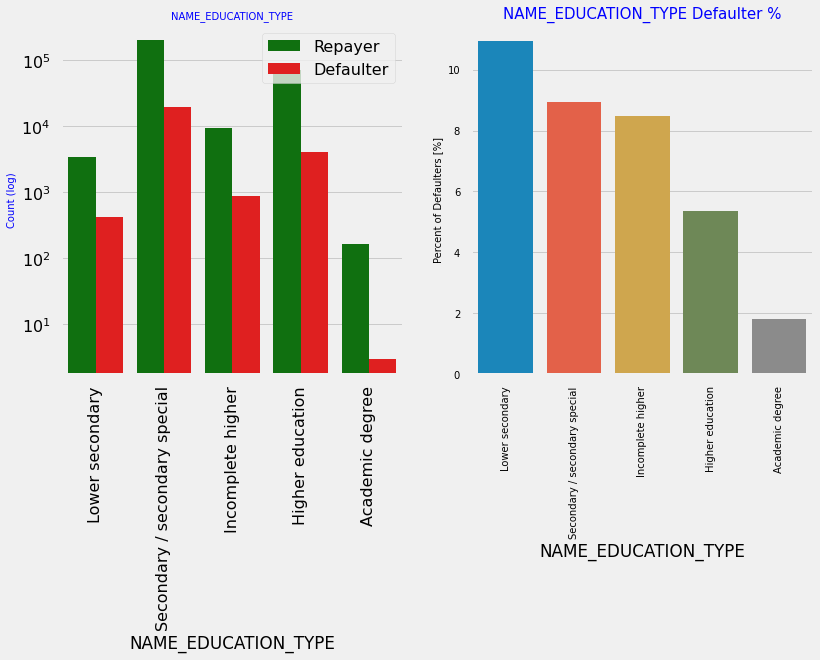

In [89]:
univariate_categorical("NAME_EDUCATION_TYPE",True,True,True)

                                    INFERENCES
                                    

Majority of the clients have secondary/ secondary special education .

Lower secondary category have the largest rate of not returning the loan (more than 10%)

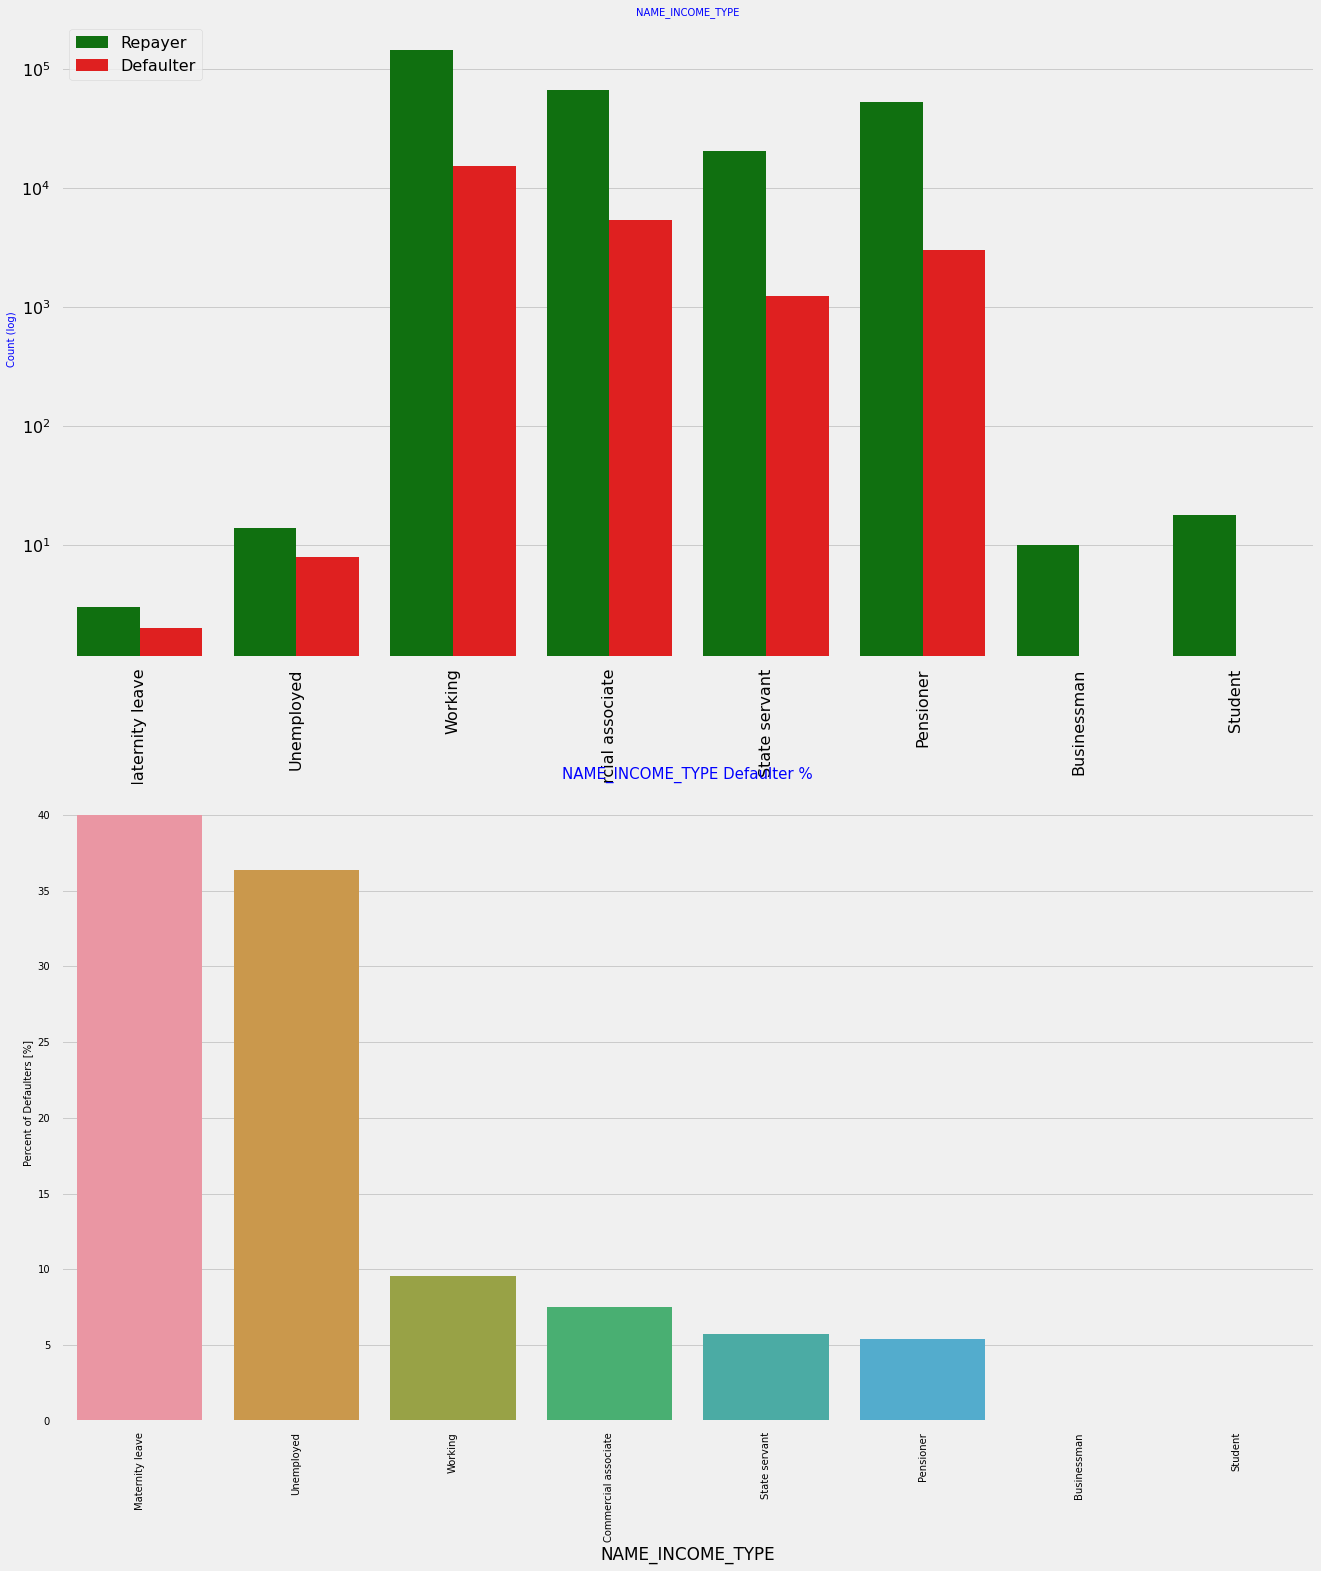

In [90]:
univariate_categorical("NAME_INCOME_TYPE",True,True,False)

                                    INFERENCES
                                    
  
Applicants with income type as Working have most loans.

Applicants with Maternity type of income has 40% ratio of not returning loans.

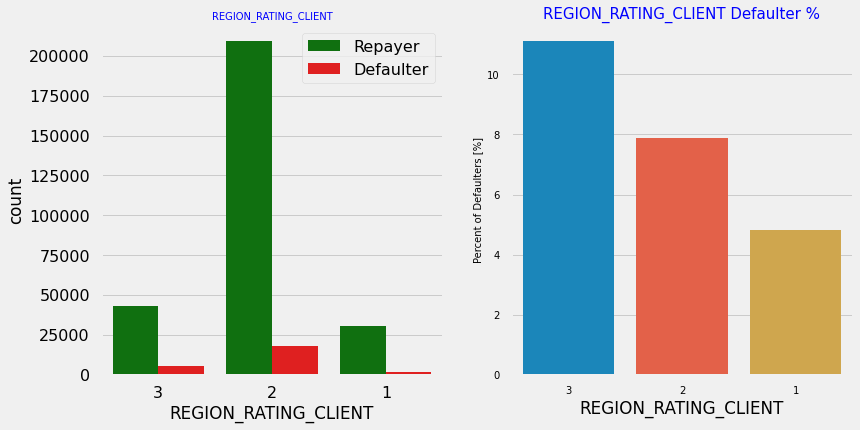

In [91]:
univariate_categorical("REGION_RATING_CLIENT",False,False,True)

                                    INFERNECES
                                    
                                    
Most of applicants are living in region rating 2 place.

Region rating 3 has highest default rate.

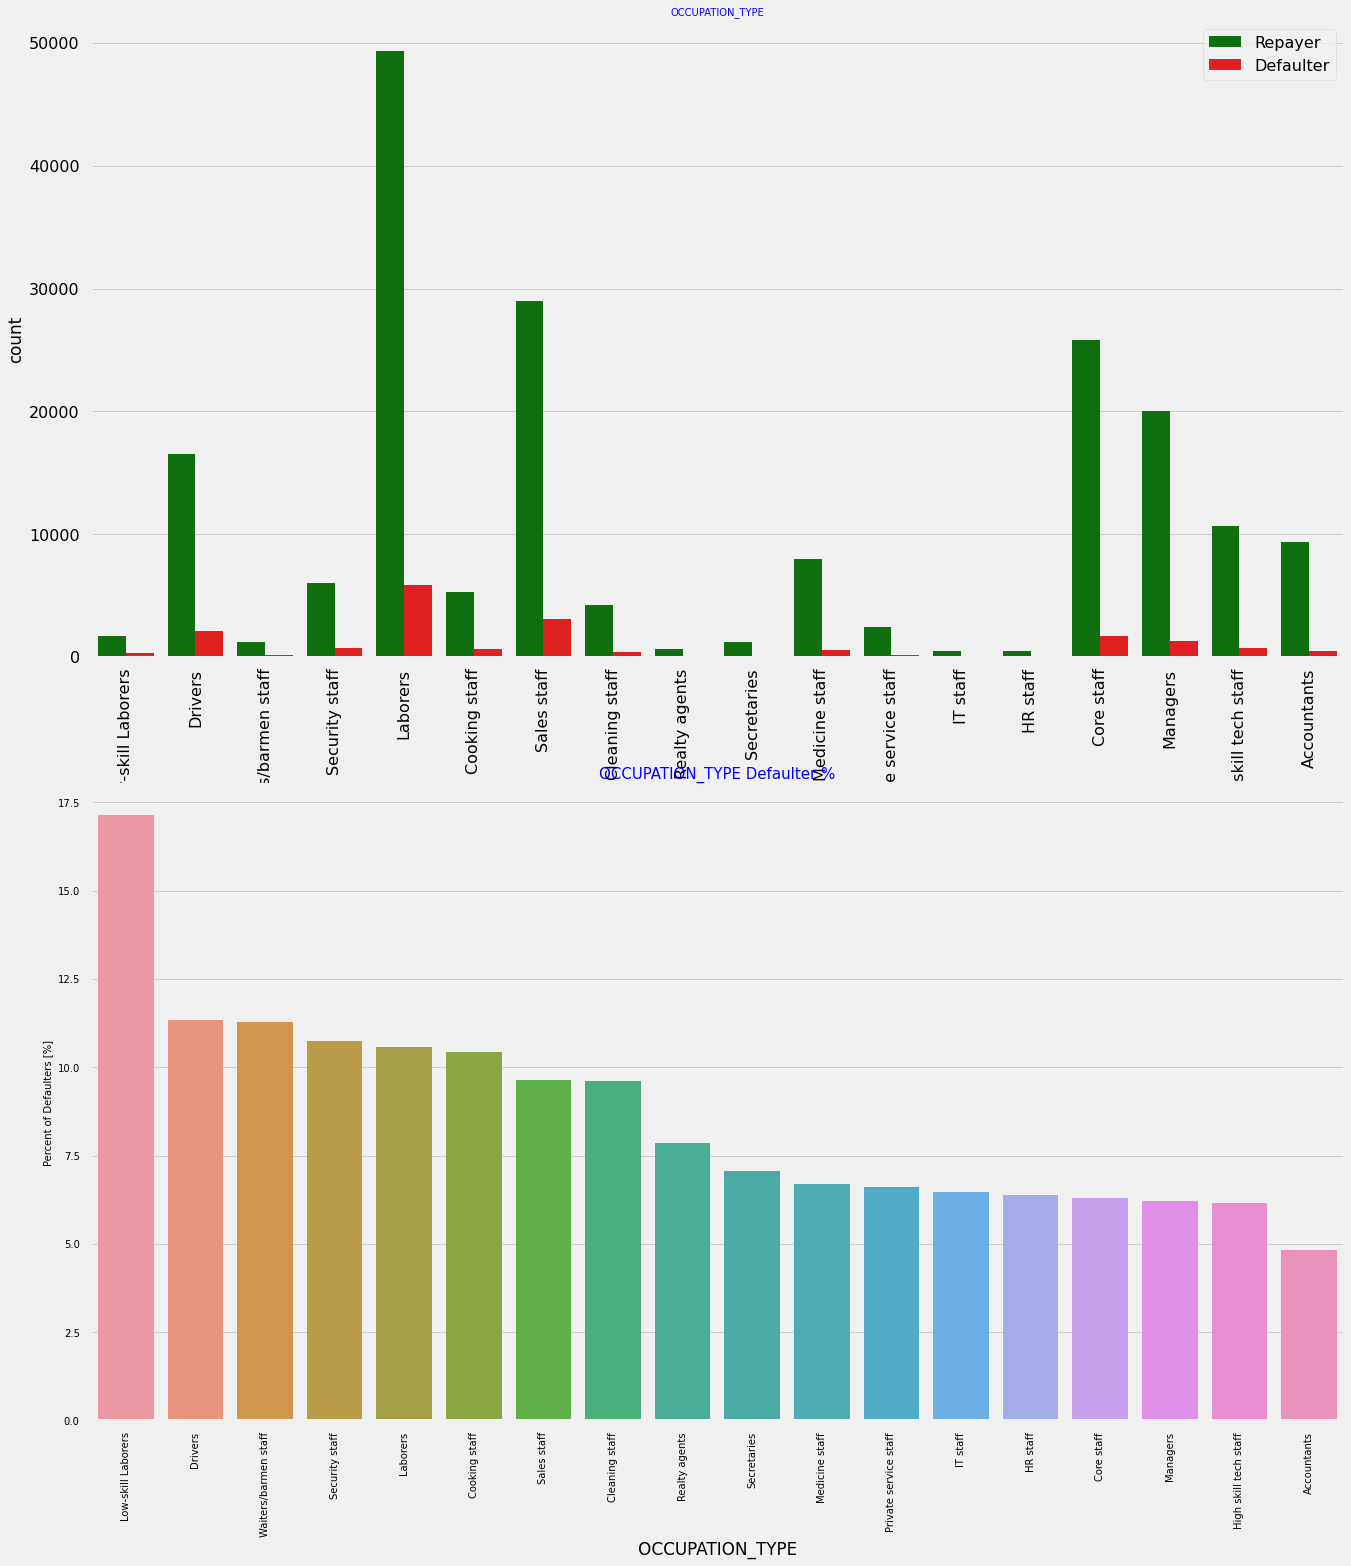

In [92]:
univariate_categorical("OCCUPATION_TYPE",False,True,False)

                                    INFERENCES
                                    
                                    
Laborers take most of the loans.

Low skill laborers have the highest %age of not repaying the loans.

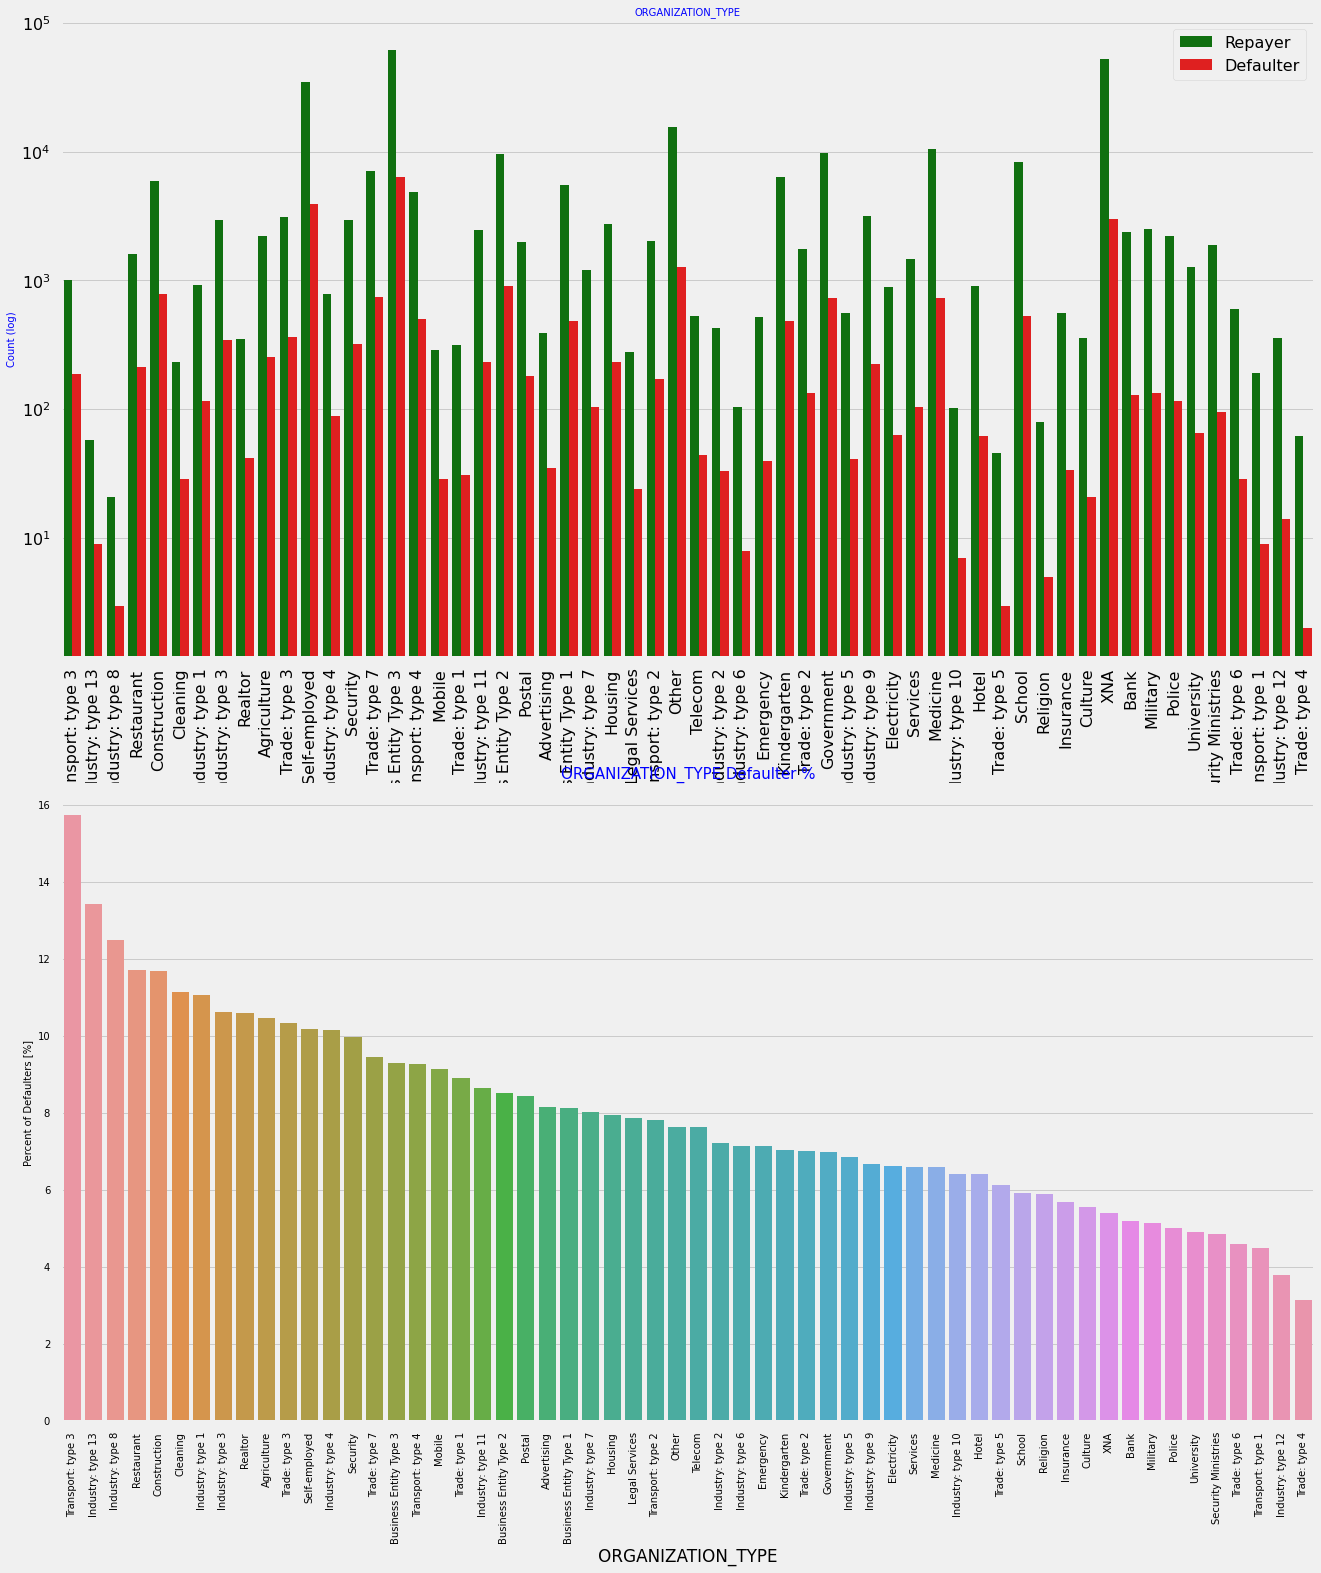

In [93]:
univariate_categorical("ORGANIZATION_TYPE",True,True,False)

                                      INFERENCES
                                      
                                      
Organizations with highest %age of loans not repaid are Transport.

Most of the people application for loan are from business entity type 3.

For a very high number of applications, Organization type information is not available.

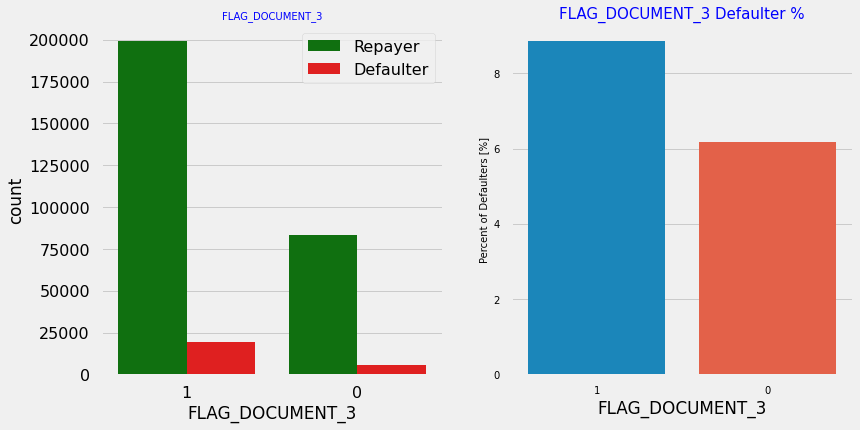

In [94]:
univariate_categorical("FLAG_DOCUMENT_3",False,False,True)

                                    INFERENCES
                                    
                                    
There is no significant correlation between repayers and defaulters in terms of submitting document 3 .                                  

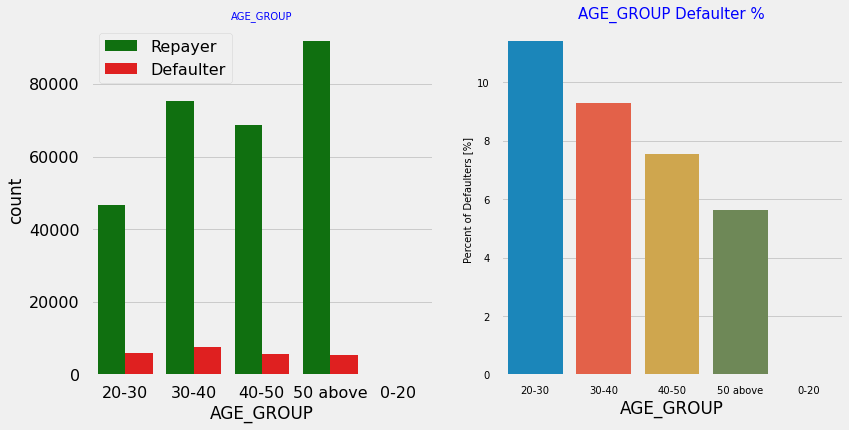

In [95]:
univariate_categorical("AGE_GROUP",False,False,True)

                                    INFERENCES
                                    
                                    
People in the age group range 20-40 have higher probability of being a defaulter.

People above age of 50 have low probability of defaulting.

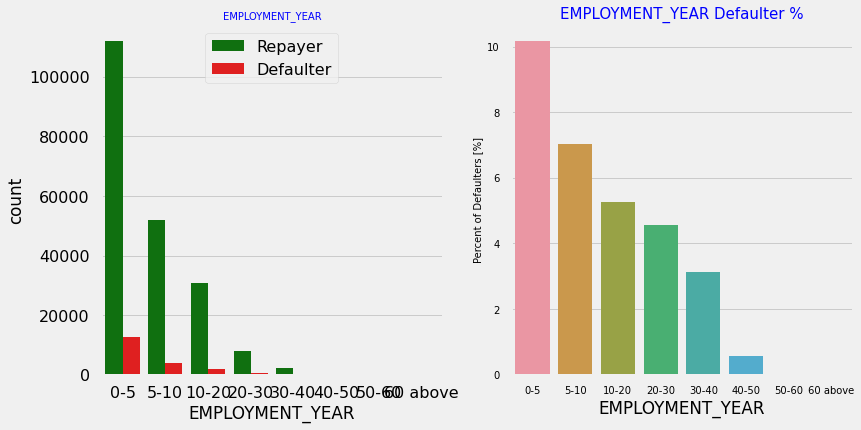

In [96]:
univariate_categorical("EMPLOYMENT_YEAR",False,False,True)

                                    INFERENCES
                                   
Most of the applicants are employed in between 0-5 yrs.

With increase of employment year , defaulting rate is gradually decreasing.

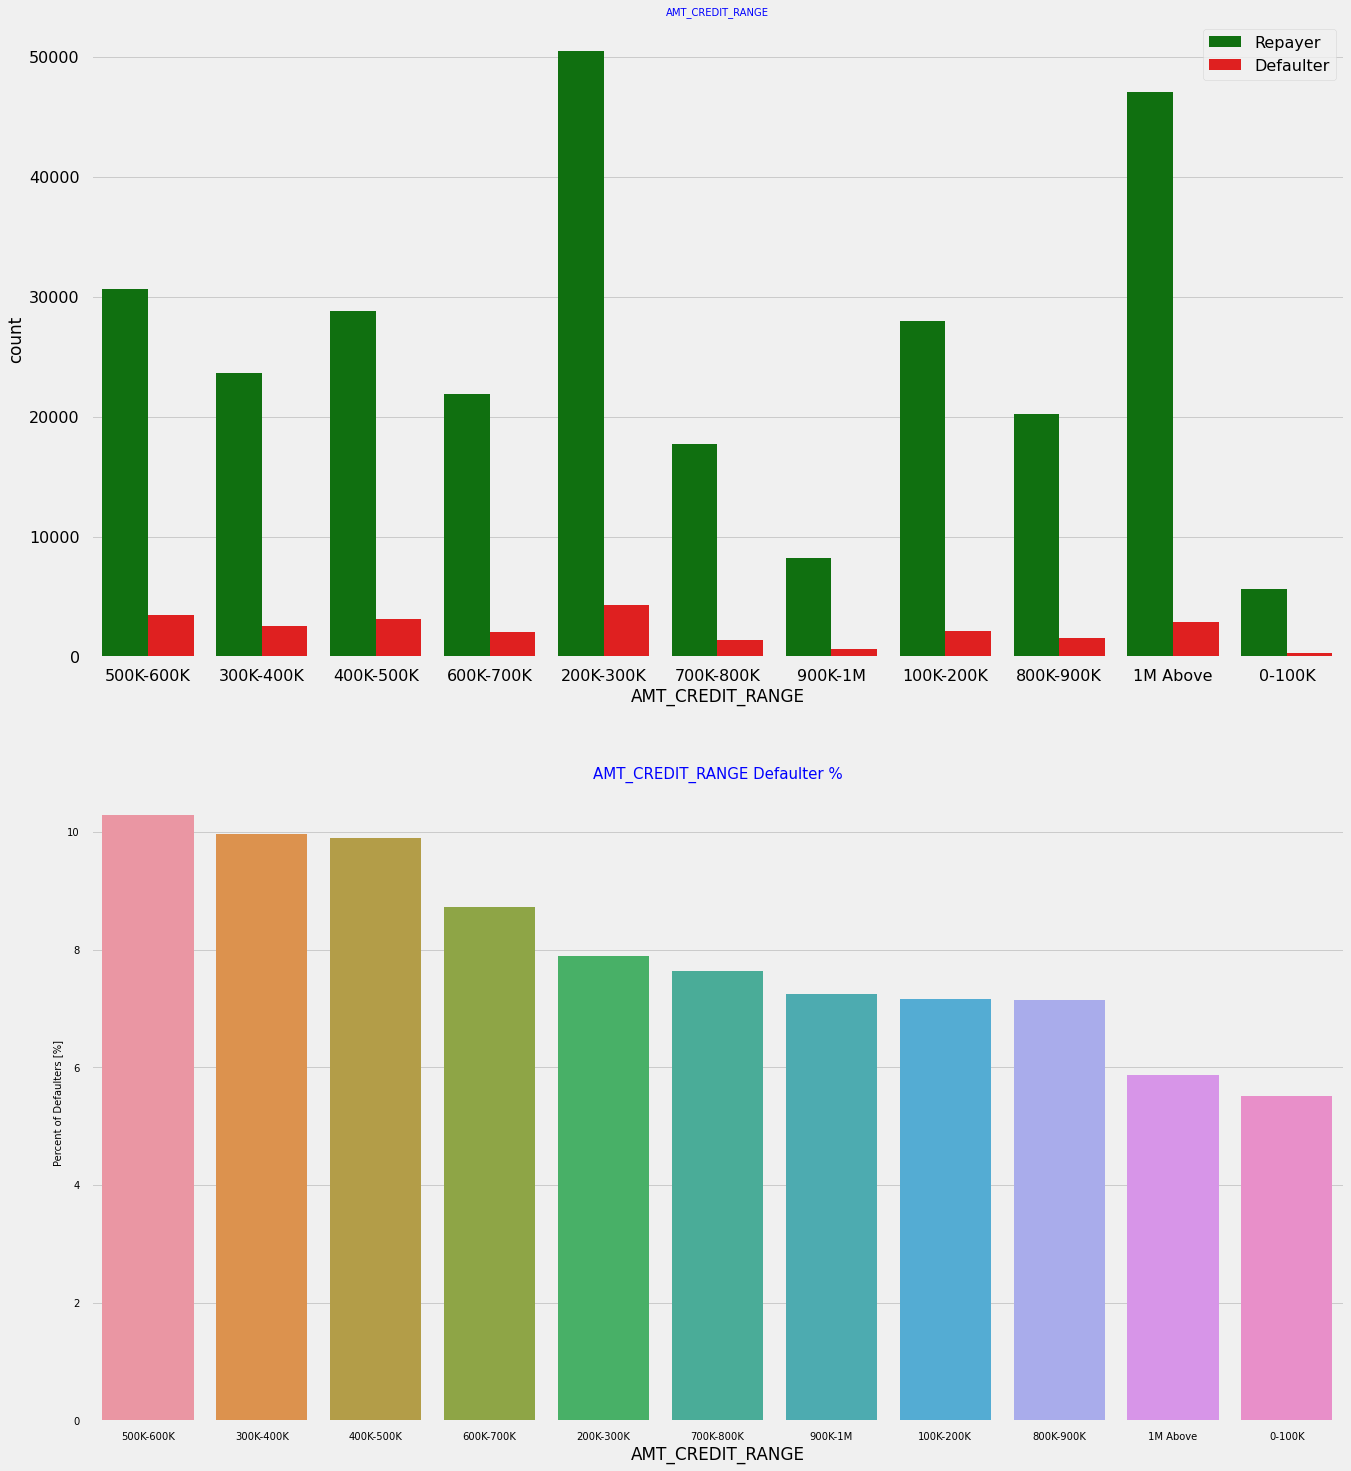

In [97]:
univariate_categorical("AMT_CREDIT_RANGE",False,False,False)

                                        INFERENCES
                                        
 More than 80% of the loan provided are for amount less than 9,00,000.
 
 Applicants who get loan for 500k-600k tend to default more than the others.

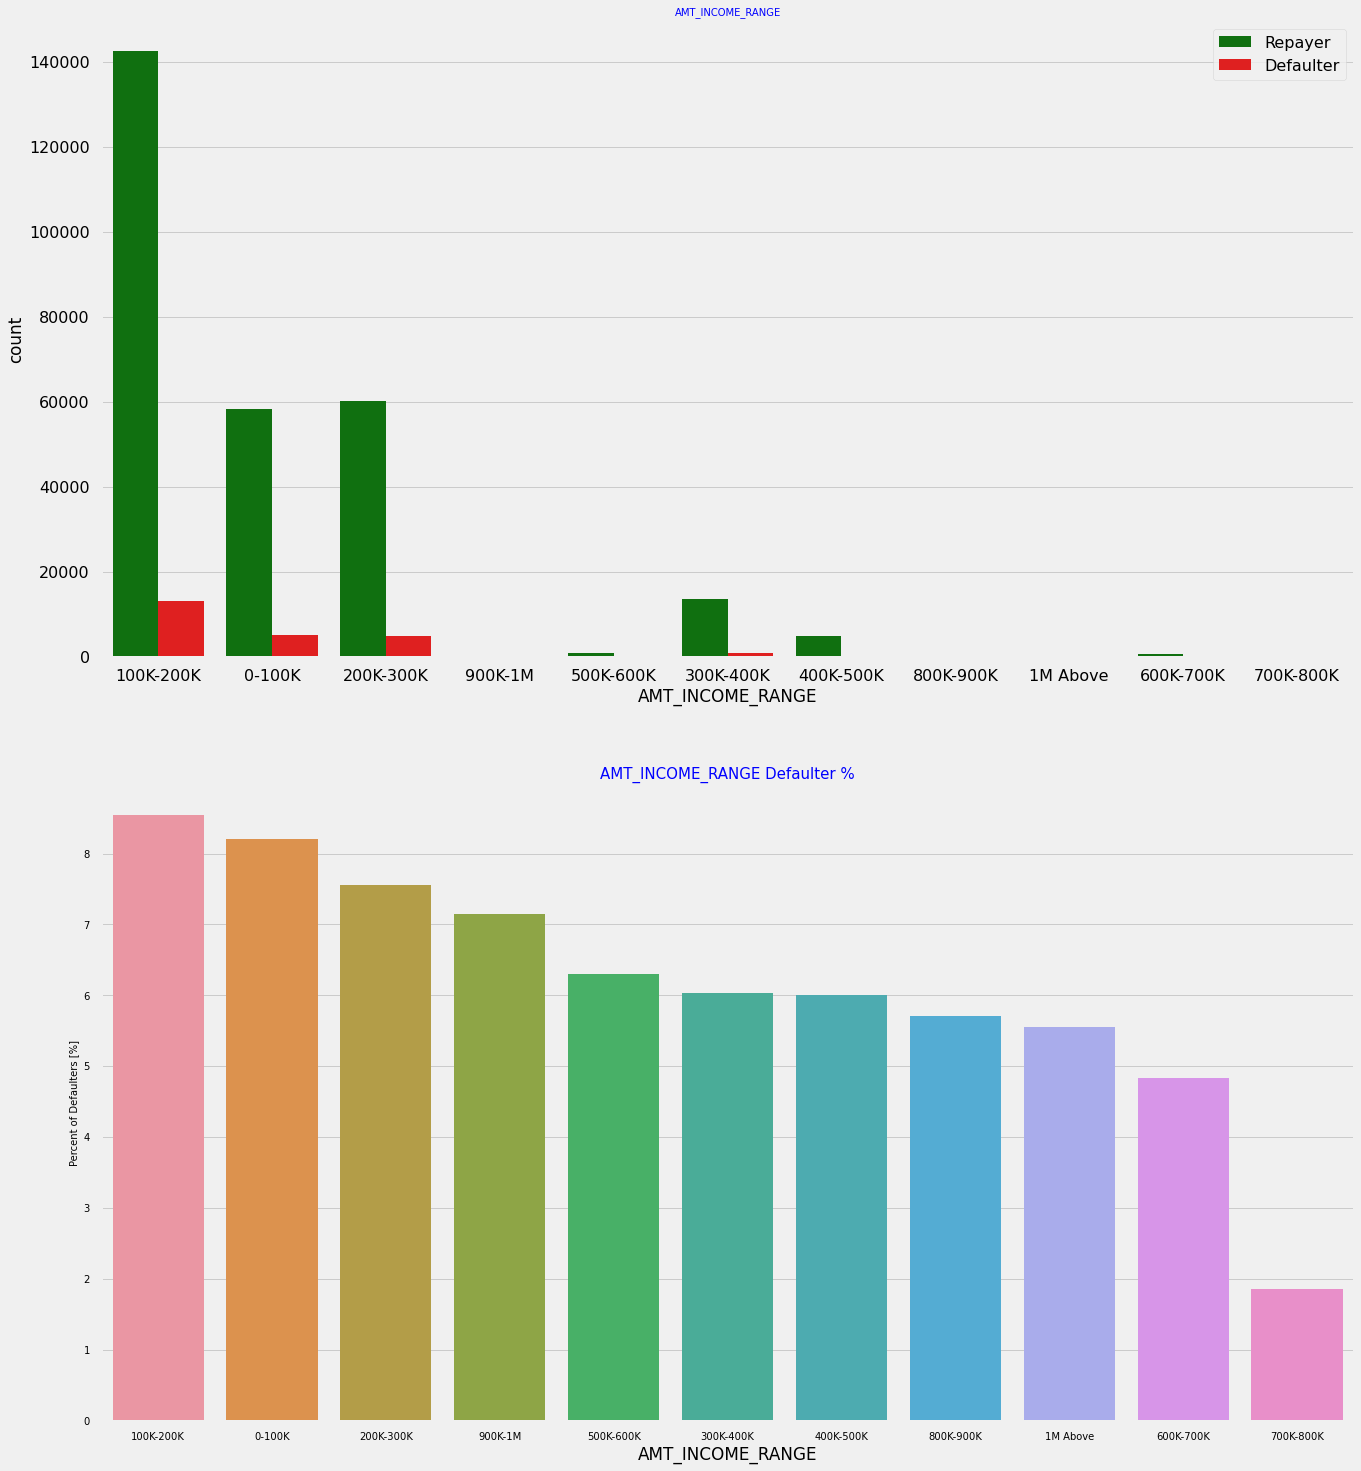

In [98]:
univariate_categorical("AMT_INCOME_RANGE",False,False,False)

                                      INFERENCES
                                      
 90% of the applicants have income less than 3,00,000.
 
 Application with Income less than 300,000 has high probability of defaulting.

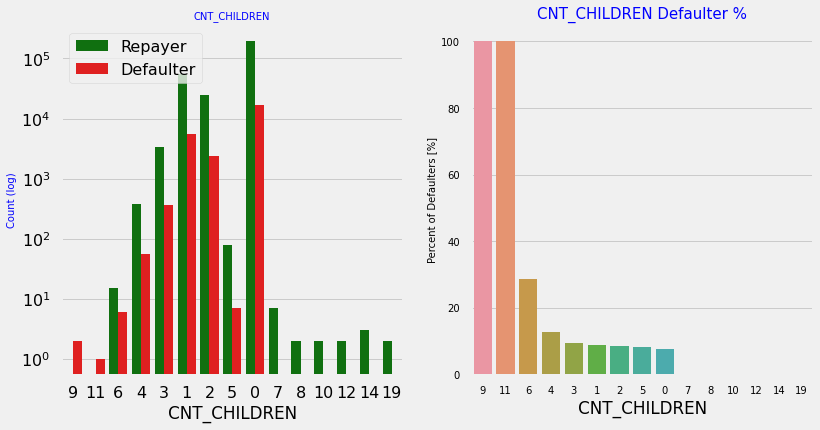

In [99]:
univariate_categorical("CNT_CHILDREN",True)

                                    INFERENCES
                                    
Most of the applicants do not have children.

Applicants who have more than 4 children have a very high rate of defaulting .

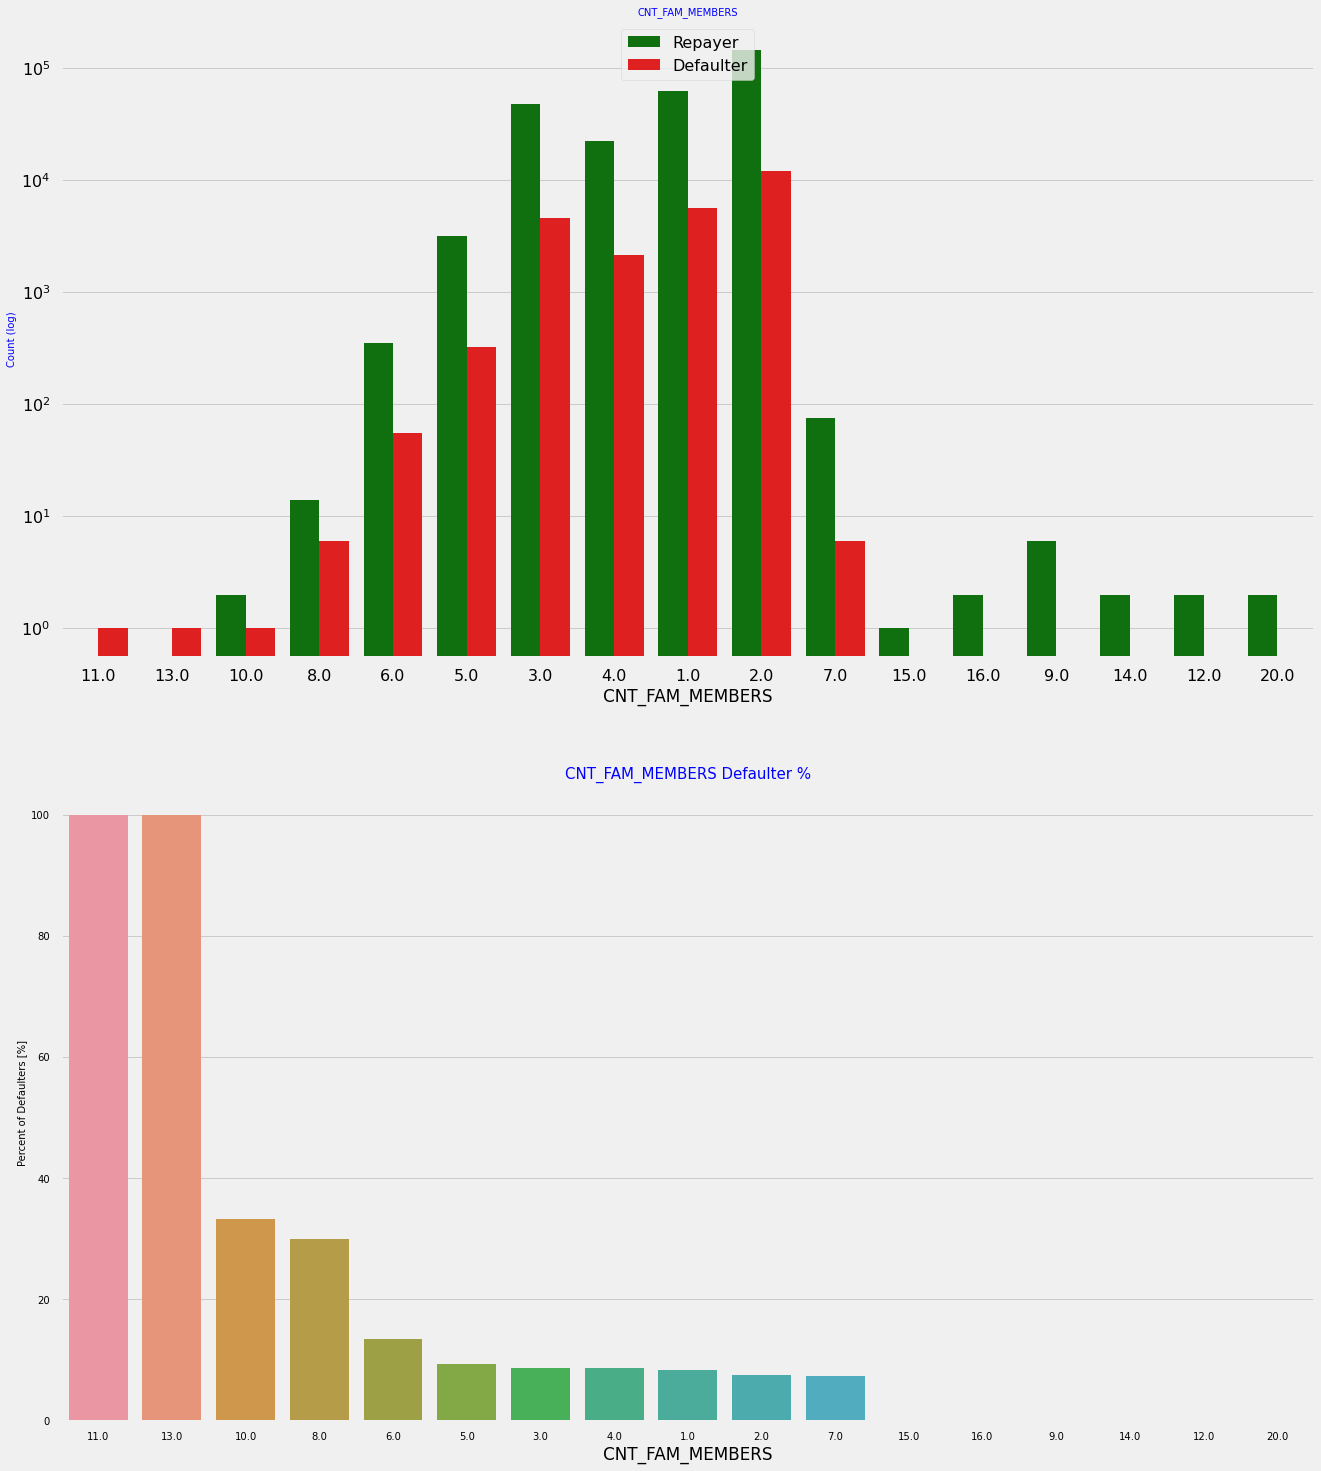

In [100]:
univariate_categorical("CNT_FAM_MEMBERS",True, False, False)

                                    INFERENCES
                                    
Family member follows the same trend as children where having more family members increase the risk of defaulting.                                   

In [101]:
application_df.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].describe().T

NAME_INCOME_TYPE,Businessman,Commercial associate,Maternity leave,Pensioner,State servant,Student,Unemployed,Working
count,10.00000,71617.000000,5.000000,55362.000000,21703.000000,18.000000,22.000000,158774.000000
mean,6.52500,2.029553,1.404000,1.364013,1.797380,1.705000,1.105364,1.631699
std,6.27226,1.479742,1.268569,0.766503,1.008806,1.066447,0.880551,3.075777
min,1.80000,0.265500,0.495000,0.256500,0.270000,0.810000,0.265500,0.256500
25%,2.25000,1.350000,0.675000,0.900000,1.125000,1.125000,0.540000,1.125000
50%,4.95000,1.800000,0.900000,1.170000,1.575000,1.575000,0.787500,1.350000
75%,8.43750,2.250000,1.350000,1.665000,2.250000,1.788750,1.350000,2.025000
max,22.50000,180.000900,3.600000,22.500000,31.500000,5.625000,3.375000,1170.000000


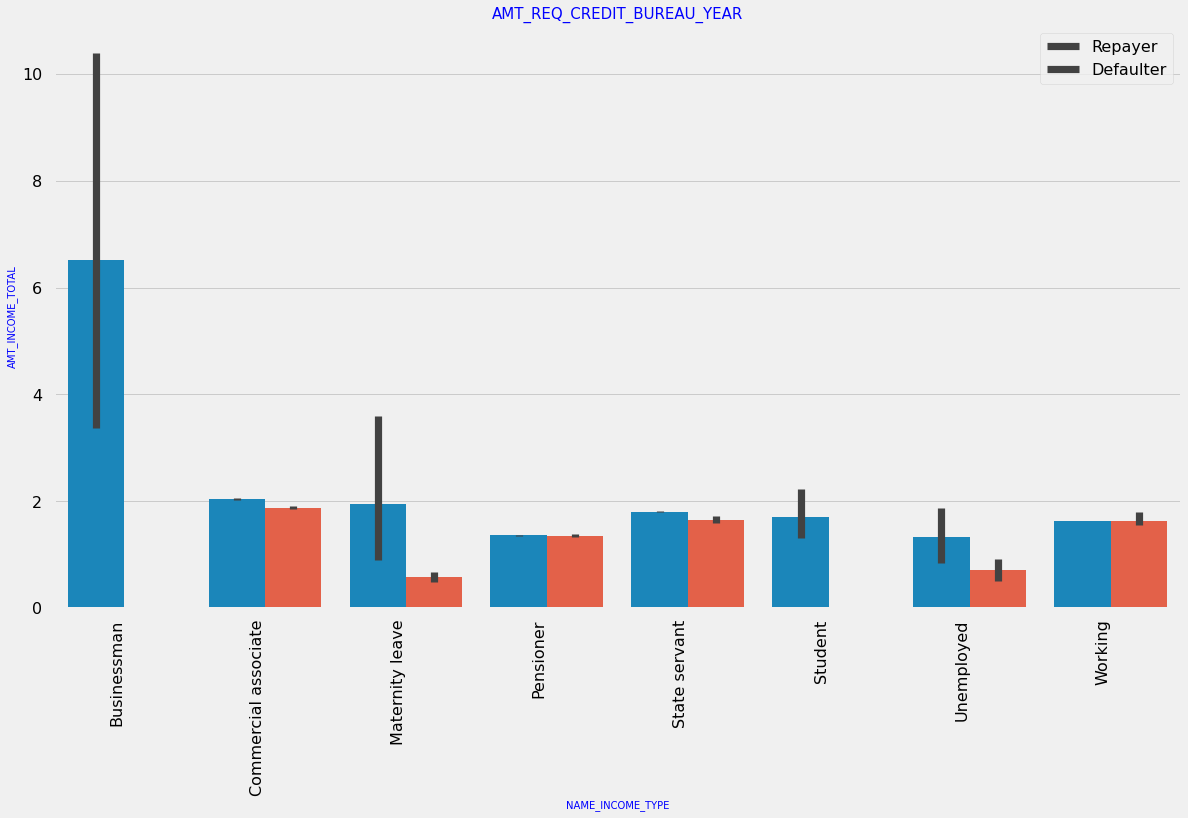

In [102]:
bivariate_bar("NAME_INCOME_TYPE","AMT_INCOME_TOTAL",application_df,"TARGET",(18,10))

                                        INFERENCES
                                        
 It can be seen that businessman's income is the highest .
 The income of a businessman could be in the range of slightly close to 4 lakhs and slightly above 10 lakhs                                       

In [103]:
application_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3',
       'AMT

In [104]:
correlation_columns=['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
                        'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
                        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
                        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 
                        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


Repayer_df = application_df.loc[application_df['TARGET']==0, correlation_columns] 
Defaulter_df = application_df.loc[application_df['TARGET']==1, correlation_columns]

In [105]:
corr_repayer = Repayer_df.corr()
corr_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(np.bool))
corr_df_repayer = corr_repayer.unstack().reset_index()
corr_df_repayer.columns =['VAR1','VAR2','Correlation']
corr_df_repayer.dropna(subset = ["Correlation"], inplace = True)
corr_df_repayer["Correlation"]=corr_df_repayer["Correlation"].abs() 
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True) 
corr_df_repayer.head(10)

,VAR1,VAR2,Correlation
94,AMT_GOODS_PRICE,AMT_CREDIT,0.987250
230,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878571
95,AMT_GOODS_PRICE,AMT_ANNUITY,0.776686
71,AMT_ANNUITY,AMT_CREDIT,0.771309
167,DAYS_EMPLOYED,DAYS_BIRTH,0.626114
70,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418953
93,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.349462
47,AMT_CREDIT,AMT_INCOME_TOTAL,0.342799
138,DAYS_BIRTH,CNT_CHILDREN,0.336966
190,DAYS_REGISTRATION,DAYS_BIRTH,0.333151


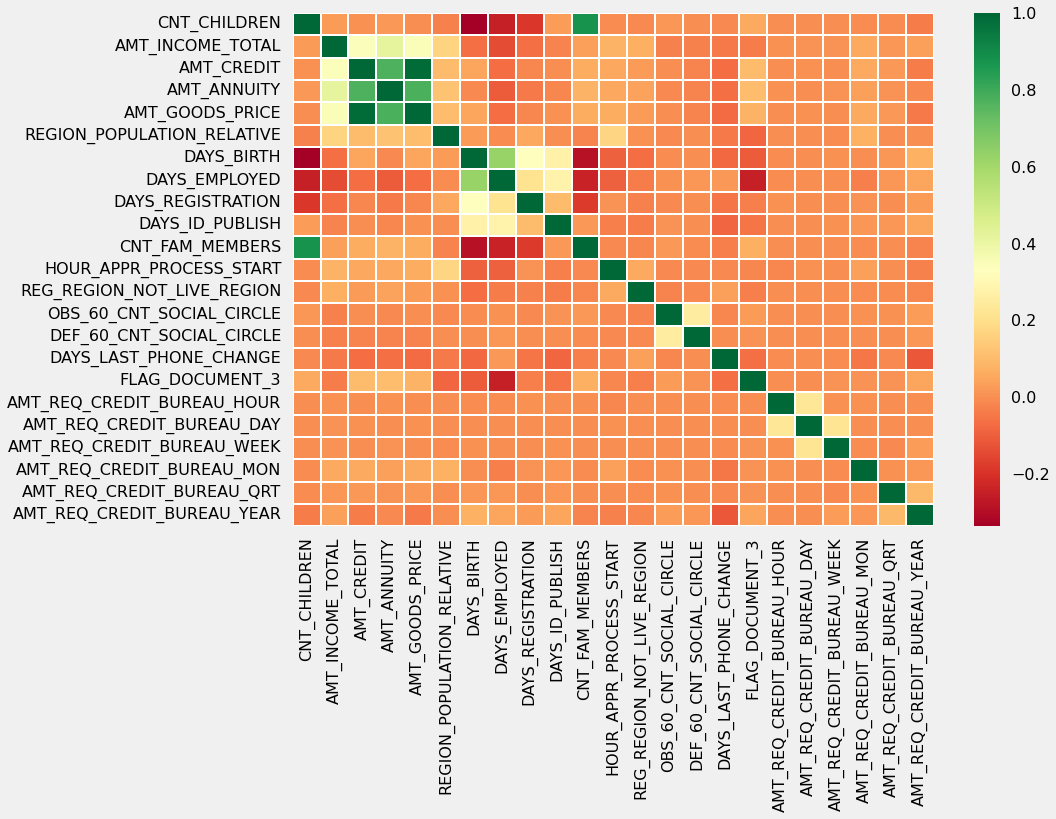

In [106]:
ax = sns.heatmap(Repayer_df.corr(), cmap="RdYlGn",annot=False,linewidth =1)
plt.show()

                                    INFERENCES
                                    
 Credit amount is highly correlated with :
 
 -> amount of goods price.
 
 -> loan annuity.
 
 -> total income.

In [107]:
corr_Defaulter = Defaulter_df.corr()
corr_Defaulter = corr_Defaulter.where(np.triu(np.ones(corr_Defaulter.shape),k=1).astype(np.bool))
corr_df_Defaulter = corr_Defaulter.unstack().reset_index()
corr_df_Defaulter.columns =['VAR1','VAR2','Correlation']
corr_df_Defaulter.dropna(subset = ["Correlation"], inplace = True)
corr_df_Defaulter["Correlation"]=corr_df_Defaulter["Correlation"].abs()
corr_df_Defaulter.sort_values(by='Correlation', ascending=False, inplace=True)
corr_df_Defaulter.head(10)

,VAR1,VAR2,Correlation
94,AMT_GOODS_PRICE,AMT_CREDIT,0.983103
230,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885484
95,AMT_GOODS_PRICE,AMT_ANNUITY,0.752699
71,AMT_ANNUITY,AMT_CREDIT,0.752195
167,DAYS_EMPLOYED,DAYS_BIRTH,0.582185
190,DAYS_REGISTRATION,DAYS_BIRTH,0.289114
375,FLAG_DOCUMENT_3,DAYS_EMPLOYED,0.272169
335,DEF_60_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,0.264159
138,DAYS_BIRTH,CNT_CHILDREN,0.259109
213,DAYS_ID_PUBLISH,DAYS_BIRTH,0.252863


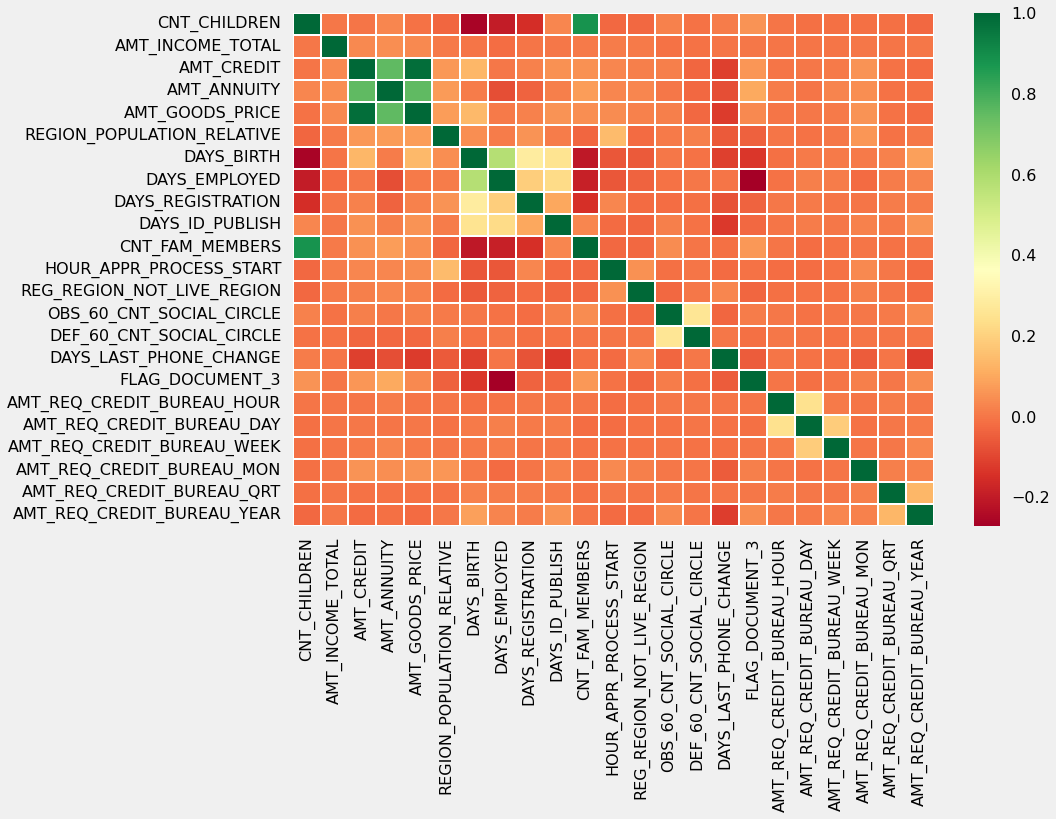

In [108]:
ax = sns.heatmap(Defaulter_df.corr(), cmap="RdYlGn",annot=False,linewidth =1)
plt.show()

                                INFERENCES
                                
Credit amount is highly correlated with amount of goods price which is same as repayers.

We can also see that repayers have high correlation in number of days employed.

There is a severe drop in the correlation between total income of the client and the credit amount amongst defaulters .

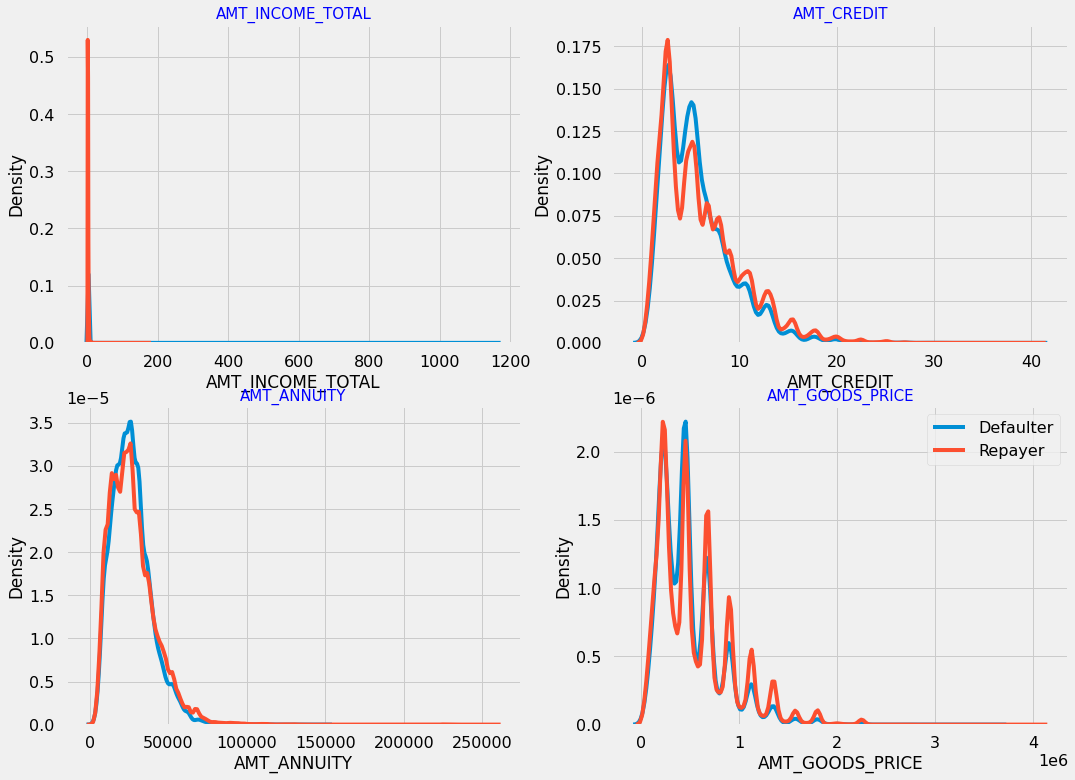

In [109]:
amount = application_df[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']]

fig = plt.figure(figsize=(16,12))

for i in enumerate(amount):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(Defaulter_df[i[1]], hist=False,label ="Defaulter")
    sns.distplot(Repayer_df[i[1]], hist=False, label ="Repayer")
    plt.title(i[1], fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    
plt.legend()

plt.show() 

                                    INFERENCES
                                    
Most number of loans are given for goods price below 10 lakhs.

Most people pay annuity below 50000 for the credit loan.

<Figure size 1080x432 with 0 Axes>

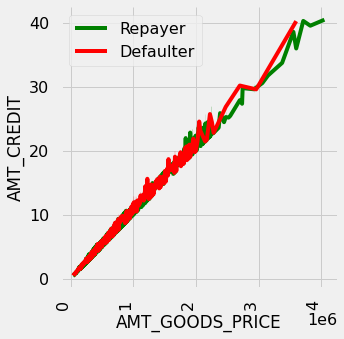

In [110]:
bivariate_rel('AMT_GOODS_PRICE','AMT_CREDIT',application_df,"TARGET", "line",['g','r'],False,(15,6))

                                      INFERENCES

When the credit amount goes beyond 3M there is an increase in the defaulters.

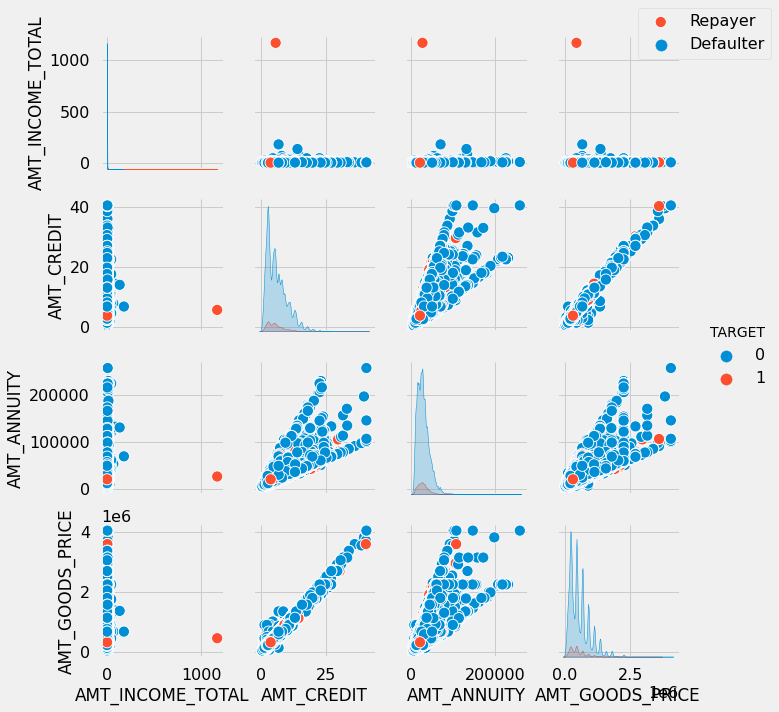

In [111]:
amount = application_df[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE','TARGET']]
amount = amount[(amount["AMT_GOODS_PRICE"].notnull()) & (amount["AMT_ANNUITY"].notnull())]
ax= sns.pairplot(amount,hue="TARGET")
ax.fig.legend(labels=['Repayer','Defaulter'])
plt.show()

                                    INFERENCES

When amt_annuity >15000 amt_goods_price> 3M, there is a lesser chance of defaulters.

AMT_CREDIT and AMT_GOODS_PRICE are highly correlated as based on the scatterplot where most of the data are consolidated in form of a line

In [112]:
loan_df = pd.merge(application_df, previous_df, how='inner', on='SK_ID_CURR')
loan_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_DECISION_GROUP
0,100002,1,Cash loans,M,N,Y,0,2.025,4.065975,24700.5,...,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,400-800
1,100003,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,...,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,400-800
2,100003,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,...,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,800-1200
3,100003,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,...,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,2000-2400
4,100004,0,Revolving loans,M,Y,Y,0,0.675,1.350000,6750.0,...,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest,800-1200


In [113]:
loan_df.shape

(1413701, 74)

In [114]:
loan_df.size

104613874

In [115]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 74 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1413701 non-null  int64   
 1   TARGET                       1413701 non-null  int64   
 2   NAME_CONTRACT_TYPE_x         1413701 non-null  category
 3   CODE_GENDER                  1413701 non-null  category
 4   FLAG_OWN_CAR                 1413701 non-null  category
 5   FLAG_OWN_REALTY              1413701 non-null  category
 6   CNT_CHILDREN                 1413701 non-null  int64   
 7   AMT_INCOME_TOTAL             1413701 non-null  float64 
 8   AMT_CREDIT_x                 1413701 non-null  float64 
 9   AMT_ANNUITY_x                1413608 non-null  float64 
 10  AMT_GOODS_PRICE_x            1412493 non-null  float64 
 11  NAME_TYPE_SUITE              1413701 non-null  category
 12  NAME_INCOME_TYPE            

In [116]:
loan_df.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,1413701.0,2.784813e+05,102811.788043,1.000020e+05,1.893640e+05,2.789920e+05,3.675560e+05,4.562550e+05
TARGET,1413701.0,8.655296e-02,0.281179,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
CNT_CHILDREN,1413701.0,4.048933e-01,0.717345,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.900000e+01
AMT_INCOME_TOTAL,1413701.0,1.733160e+00,1.985734,2.565000e-01,1.125000e+00,1.575000e+00,2.070000e+00,1.170000e+03
AMT_CREDIT_x,1413701.0,5.875537e+00,3.849173,4.500000e-01,2.700000e+00,5.084955e+00,8.079840e+00,4.050000e+01
AMT_ANNUITY_x,1413608.0,2.701702e+04,13951.164803,1.615500e+03,1.682100e+04,2.492550e+04,3.454200e+04,2.250000e+05
AMT_GOODS_PRICE_x,1412493.0,5.277186e+05,353246.491860,4.050000e+04,2.385000e+05,4.500000e+05,6.795000e+05,4.050000e+06
REGION_POPULATION_RELATIVE,1413701.0,2.074985e-02,0.013347,2.900000e-04,1.003200e-02,1.885000e-02,2.866300e-02,7.250800e-02
DAYS_BIRTH,1413701.0,1.632105e+04,4344.557089,7.489000e+03,1.273900e+04,1.604400e+04,1.998000e+04,2.520100e+04
DAYS_EMPLOYED,1413701.0,7.266347e+04,143337.360991,0.000000e+00,1.042000e+03,2.401000e+03,6.313000e+03,3.652430e+05


In [117]:
L0 = loan_df[loan_df['TARGET']==0] # Repayers
L1 = loan_df[loan_df['TARGET']==1] # Defaulters

                                      INFERENCES
                                      
  Loan purpose has high number of unknown values.
  
  Highest default rate seems to be of the loan taken for the purpose of repairs.

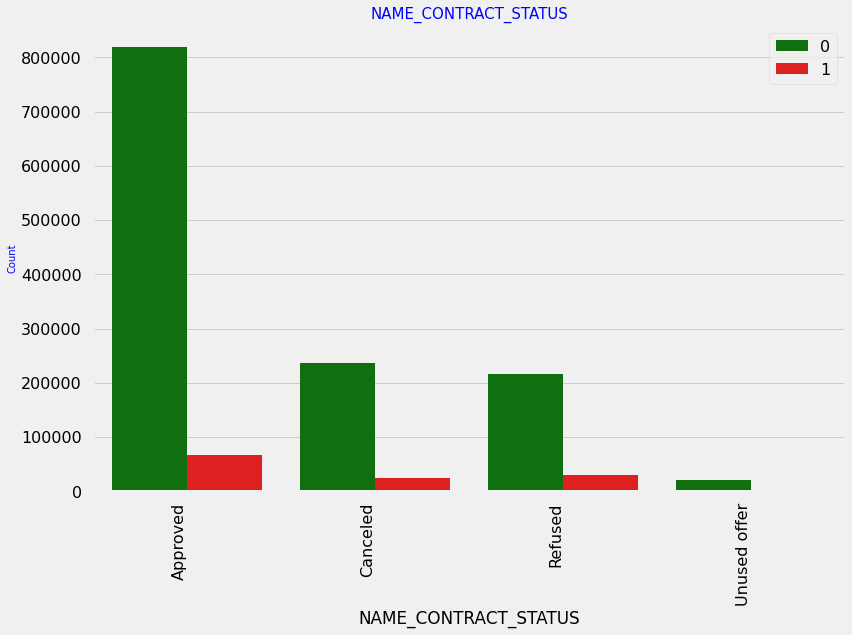

                             Counts Percentage
NAME_CONTRACT_STATUS TARGET                   
Approved             0       818856     92.41%
                     1        67243      7.59%
Canceled             0       235641     90.83%
                     1        23800      9.17%
Refused              0       215952      88.0%
                     1        29438      12.0%
Unused offer         0        20892     91.75%
                     1         1879      8.25%


In [118]:
univariate_merged("NAME_CONTRACT_STATUS",loan_df,"TARGET",['g','r'],False,(12,8))
g = loan_df.groupby("NAME_CONTRACT_STATUS")["TARGET"]
df1 = pd.concat([g.value_counts(),round(g.value_counts(normalize=True).mul(100),2)],axis=1, keys=('Counts','Percentage'))
df1['Percentage'] = df1['Percentage'].astype(str) +"%" # adding percentage symbol in the results for understanding
print (df1)

                                        INFERENCES
                                        
 90% of the previously cancelled client have actually repayed the loan.
 
 88% of the clients who have been previously refused a loan has payed back the loan in current case.

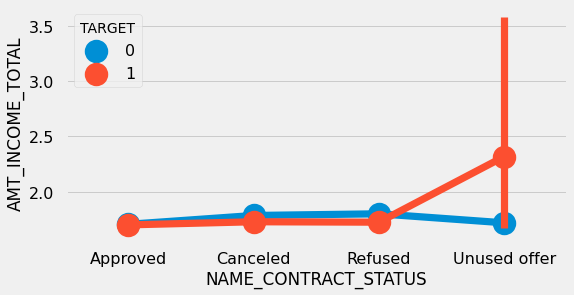

In [119]:
merged_pointplot("NAME_CONTRACT_STATUS",'AMT_INCOME_TOTAL')

                                            INFERENCES
                                            
The point plot show that the people who have not used offer earlier have defaulted even when there average income is higher than others.            

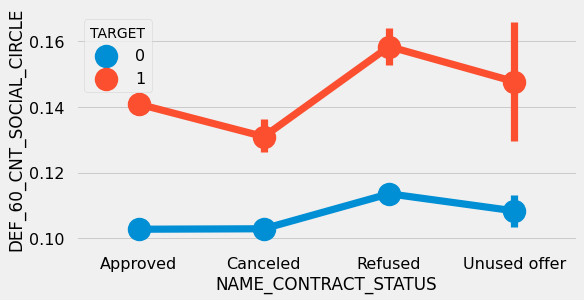

In [120]:
merged_pointplot("NAME_CONTRACT_STATUS",'DEF_60_CNT_SOCIAL_CIRCLE')

                                          INFERENCES

Clients who have average of 0.13 or higher DEF_60_CNT_SOCIAL_CIRCLE score tend to default more and hence client's social circle has to be analysed before providing the loan.

# CONCLUSIONS

DECISIVE FACTORS WHETHER AN APPLICANT WILL BE REPAYER:

1. NAME_EDUCATION_TYPE: Academic degree has less defaults.
2. NAME_INCOME_TYPE: Student and Businessmen have no defaults.
3. REGION_RATING_CLIENT: RATING 1 is safer.
4. ORGANIZATION_TYPE: Clients with Trade Type 4 and 5 and Industry type 8       have defaulted less than 3%
5. DAYS_BIRTH: People above age of 50 have low probability of defaulting.
6. DAYS_EMPLOYED: Clients with more than 40 year experience having less            than 1% default rate.
7. AMT_INCOME_TOTAL:Applicant with Income more than 7 lakhs are less likely        to default.
8. NAME_CASH_LOAN_PURPOSE: Loans bought buying garage are being                    repayed mostly.
9. CNT_CHILDREN: People with zero to two children tend to repay the loans.

DECISIVE FACTORS WHETHER AN APPLICANT WILL BE DEFAULTER:

1. CODE_GENDER: Men are at relatively higher default rate
2. NAME_FAMILY_STATUS : People who have civil marriage or who are single default a lot.
3. NAME_INCOME_TYPE: Clients who are either at Maternity leave OR Unemployed default a lot.
4. REGION_RATING_CLIENT: People who live in Rating 3 has highest defaults.
5. OCCUPATION_TYPE: Avoid Low-skill Laborers, Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff as the default rate is huge.
6. ORGANIZATION_TYPE: Organizations with highest percent of loans not repaid are Transport. Self-employed people have relative high defaulting rate, and thus should be avoided to be approved for loan or provide loan with higher interest rate to mitigate the risk of defaulting.
7. DAYS_BIRTH: Avoid young people who are in age group of 20-40 as they have higher probability of defaulting.
8. DAYS_EMPLOYED: People who have less than 5 years of employment have high default rate.
9. CNT_CHILDREN & CNT_FAM_MEMBERS: Clients who have children equal to or more than 9 default 100% and hence their applications are to be rejected.
10. AMT_GOODS_PRICE: When the credit amount goes beyond 3M, there is an increase in defaulters.